# Exploratory Data Analysis and Feature Engineering for Diabetes Dataset

## Introduction

**Half of the people currently living with diabetes are unaware of their disease, resulting in a higher risk of harmful and costly complications. Diabetes is a leading global cause of cardiovascular disease, a leading cause of blindness, of kidney failure and of lower-limb amputation.**

**I will explore the dataset and try to find out factors that affect diabetes more**

In [31]:
# Importing python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Reading the dataset using pandas function
diabetes_raw  = pd.read_excel("pima-indians-diabetes (2).xlsx")

In [34]:
# Making a copy of raw_data
diabetes = diabetes_raw.copy()

In [35]:
diabetes.head(10)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### The diabetes dataset contains  independent variables like number of pregnancies, Glucose, Blood Pressure, BMI, Age and so on and one target variable Outcome.

In [36]:
diabetes.tail()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [37]:
diabetes.shape

(768, 9)

**768 observations and 9 variables are present in this dataset**

In [38]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [39]:
# Checking the datatype of the variables
diabetes.dtypes

Pregnancies                     int64
Glucose                         int64
Blood Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes Pedigree Function    float64
Age                             int64
Outcome                         int64
dtype: object

In [40]:
# Checking total count of null values in each variable
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
# Checking count of unqiue values in each variables
diabetes.nunique()

Pregnancies                    17
Glucose                       136
Blood Pressure                 47
Skin Thickness                 51
Insulin                       186
BMI                           248
Diabetes Pedigree Function    517
Age                            52
Outcome                         2
dtype: int64

In [43]:
# Deleting duplicate entries 
diabetes.drop_duplicates()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
# Analysing the statistical measures using pandas function
diabetes.describe()


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Only Age & Diabetes pedigree function is having non zero value as their minimum and rest all columns having zero as their minimum. Practically it is not possible, only Pregnancie Column can take the values as zero**

In [45]:
# Changing the name of the variable so that it will look more readable
diabetes_1 = diabetes.rename(columns = {'Blood Pressure' : 'Blood_Pressure', 'Skin Thickness':'Skin_Thickness', 'Diabetes Pedigree Function': 'Diabetes_Pedigree_Function'  })
diabetes_1.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
# Checking the skewness of each variable
diabetes_1.skew()

Pregnancies                   0.901674
Glucose                       0.173754
Blood_Pressure               -1.843608
Skin_Thickness                0.109372
Insulin                       2.272251
BMI                          -0.428982
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
Outcome                       0.635017
dtype: float64

In [47]:
# Checking the total count of each category from outcome variable
diabetes_2 = diabetes['Outcome'].value_counts()
diabetes_2

0    500
1    268
Name: Outcome, dtype: int64

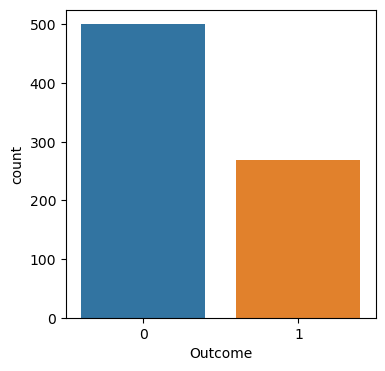

In [48]:
# Using countplot I have checked the distribution
plt.figure(figsize = (4,4))
sns.countplot(data = diabetes_1, x = 'Outcome')
plt.show()

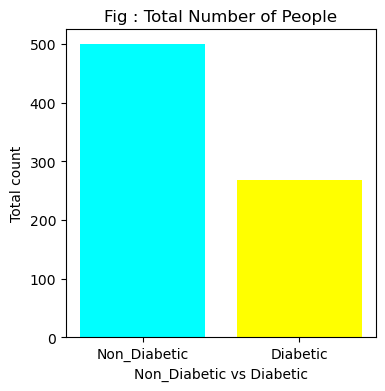

In [49]:
# Using barplot i also checked the distribution
count = diabetes_1['Outcome'].value_counts()
count
Diabe = ['Non_Diabetic', 'Diabetic']
plt.figure(figsize = (4,4))
plt.bar(Diabe, count, data = diabetes_raw, color = ['cyan', 'yellow'])
plt.title("Fig : Total Number of People")
plt.xlabel("Non_Diabetic vs Diabetic")
plt.ylabel("Total count")
plt.show()

**From Barplot it is clear that the distribution of target variable is not imbalanced**

In [50]:
# Using unique function i have checked the unique values for different variables
diabetes_1['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [51]:
diabetes_1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [52]:
diabetes_1['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

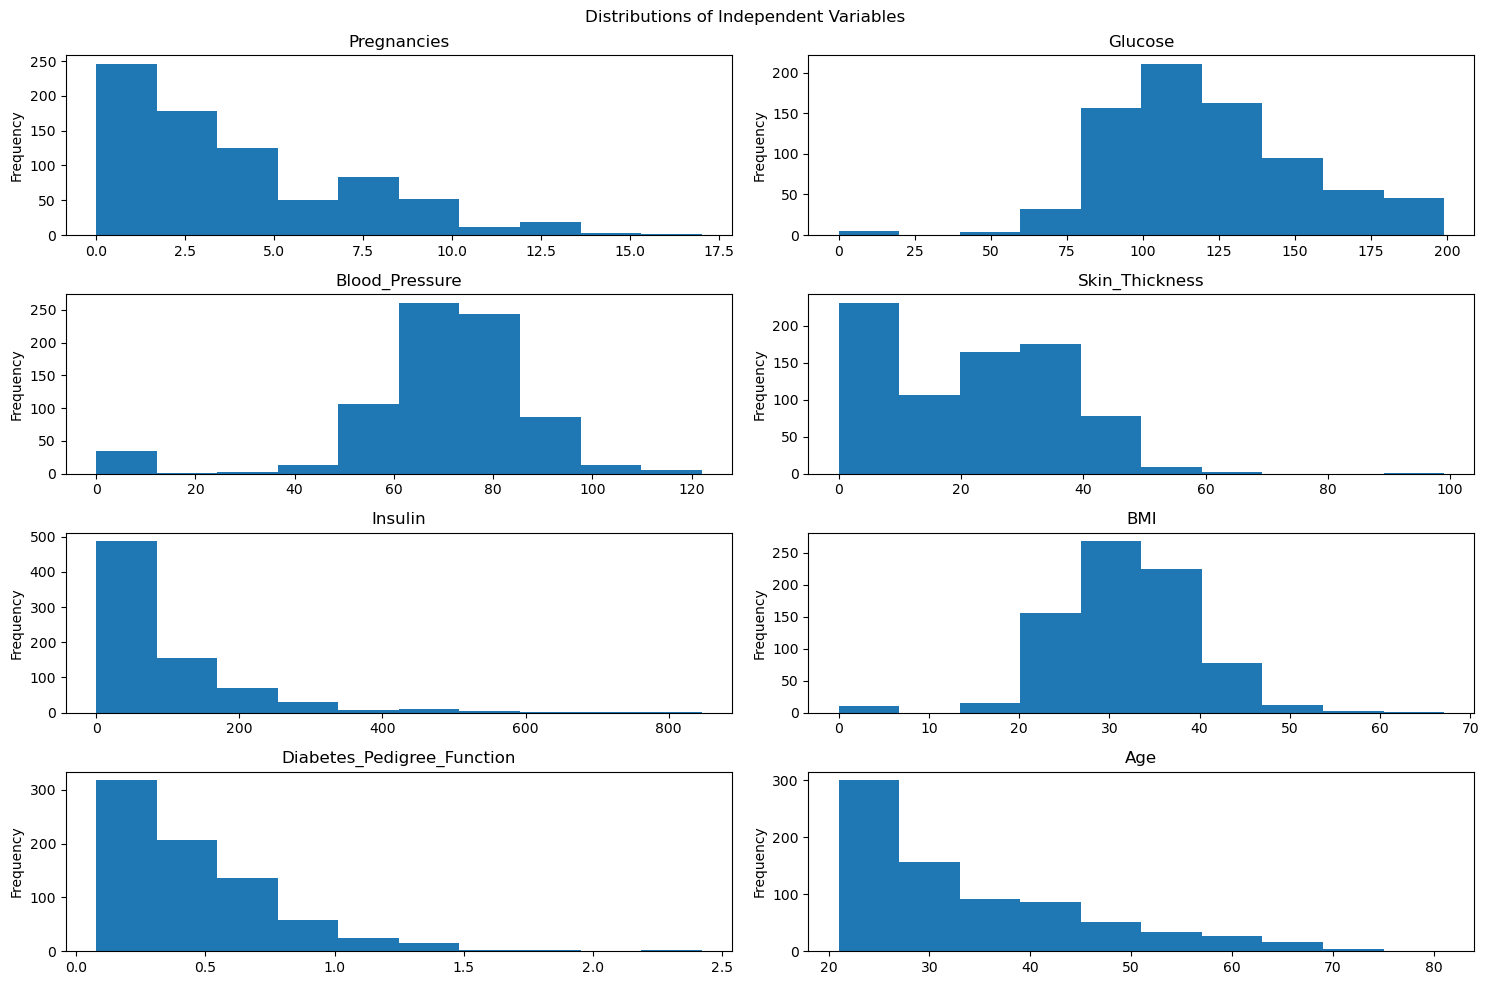

In [53]:
# Taking the help of visualization and i want to see the distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
a = 0
drop_outcome = diabetes_1.drop('Outcome', axis = 1).columns
for col in drop_outcome:
    diabetes_1[col].plot(kind = 'hist', ax = axes[a], title = col)
    a = a +  1

plt.suptitle('Distributions of Independent Variables')
plt.tight_layout()
plt.show()

**From the above Histogram it is cleared that most of the variables the data is skewed.
Age is mostly in between 22 and 40**

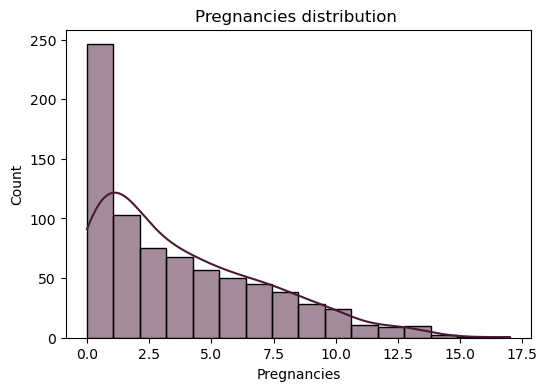

In [54]:
# checked the distribution of Pregnancies
plt.figure(figsize=(6, 4))
sns.histplot(data = diabetes_1, x='Pregnancies', kde=True, color="#4a1936")
plt.title('Pregnancies distribution ')
plt.show()

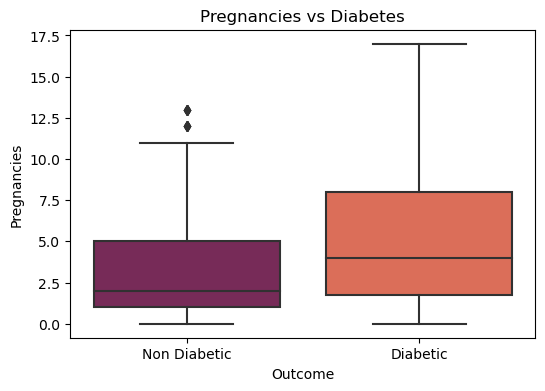

In [55]:
#PLotting boxplot Pregnancies vs Diabetes
plt.figure(figsize=(6, 4))
sns.boxplot(data = diabetes_1, x = 'Outcome', y = 'Pregnancies', palette='rocket').set_xticklabels(['Non Diabetic', 'Diabetic'])
plt.title('Pregnancies vs Diabetes')
plt.show()

**We can see that the number of pregnancies is high for the diabetic people**

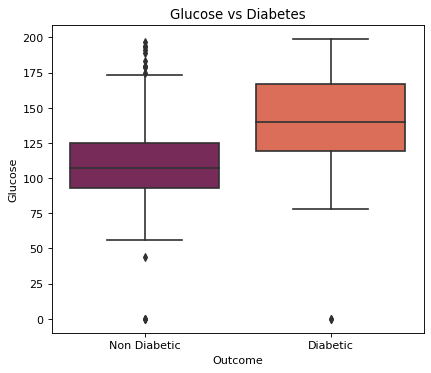

In [56]:
#Plotted boxplot using seaborn
plt.figure(figsize=(6, 5), dpi=80)
sns.boxplot(data = diabetes_1, x = 'Outcome', y = 'Glucose', palette='rocket').set_xticklabels(['Non Diabetic', 'Diabetic'])
plt.title('Glucose vs Diabetes')
plt.show()

**People with diabetes have much higher blood glucose levels**

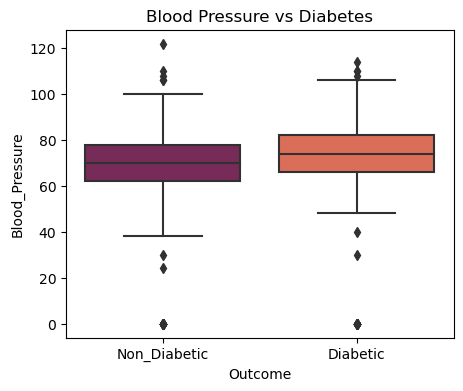

In [57]:
#Plotted boxplot between Blood_Pressure vs Diabetes
plt.figure(figsize=(5, 4))
sns.boxplot(data = diabetes_1, x = 'Outcome', y = 'Blood_Pressure', palette='rocket').set_xticklabels(['Non_Diabetic', 'Diabetic'])
plt.title('Blood Pressure vs Diabetes')
plt.show()

**Diabetes poeple have slightly higher blood pressure than Non diabetic people**

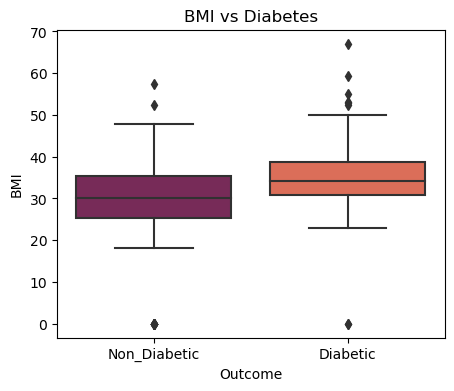

In [58]:
# Used boxplot BMI vs Outcome
plt.figure(figsize=(5, 4))
sns.boxplot(data = diabetes_1, x = 'Outcome', y = 'BMI', palette='rocket').set_xticklabels(['Non_Diabetic', 'Diabetic'])
plt.title('BMI vs Diabetes')
plt.show()

**Diabetic people have higher BMI**

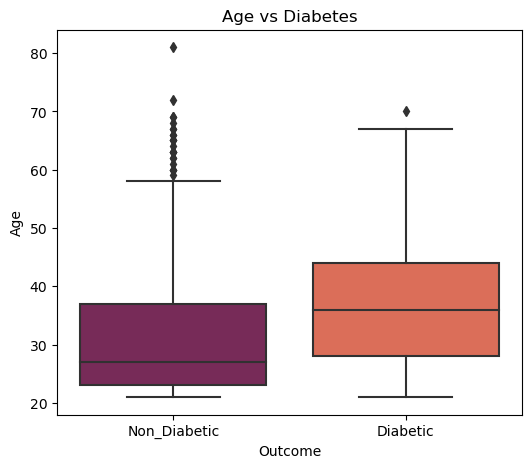

In [59]:
plt.figure(figsize=(6, 5))
sns.boxplot(data = diabetes_1, x = 'Outcome', y = 'Age', palette='rocket').set_xticklabels(['Non_Diabetic', 'Diabetic'])
plt.title('Age vs Diabetes')
plt.show()

**We can see after Age = 30 poeple suffered diabetes more**

## Now Data Cleaning and Preprocessing

In [60]:
# Selecting the Variables which has missing values

diabetes_missing = diabetes_1[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI','Diabetes_Pedigree_Function','Age']]
diabetes_missing.head(10)

,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
6,78,50,32,88,31.0,0.248,26
7,115,0,0,0,35.3,0.134,29
8,197,70,45,543,30.5,0.158,53
9,125,96,0,0,0.0,0.232,54


In [61]:
# Creating a DataFrame
diabetes_missing_1 = pd.DataFrame(diabetes_missing)
diabetes_missing_1


,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [62]:
# Replaced zero values from all the independent variables to NaN
diabetes_missing_2 = diabetes_missing_1.replace(0, np.nan, regex=True)
diabetes_missing_2.head(10)

,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
5,116.0,74.0,NaN,NaN,25.6,0.201,30
6,78.0,50.0,32.0,88.0,31.0,0.248,26
7,115.0,NaN,NaN,NaN,35.3,0.134,29
8,197.0,70.0,45.0,543.0,30.5,0.158,53
9,125.0,96.0,NaN,NaN,NaN,0.232,54


**Replaced all zeros with NAN because Python counts zeros as a record. In starting when i used isnull fucntion to check for null values it was showing that there is no any null values. That's why i replaced zeros with NAN.**

**Analyzing the amount of missing data**

In [63]:
# Checked Total missing values
diabetes_missing_2.isnull().sum()

Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
dtype: int64

In [64]:
# Checked Total missing values in percentage
diabetes_missing_2.isnull().mean()*100

Glucose                        0.651042
Blood_Pressure                 4.557292
Skin_Thickness                29.557292
Insulin                       48.697917
BMI                            1.432292
Diabetes_Pedigree_Function     0.000000
Age                            0.000000
dtype: float64

<AxesSubplot:>

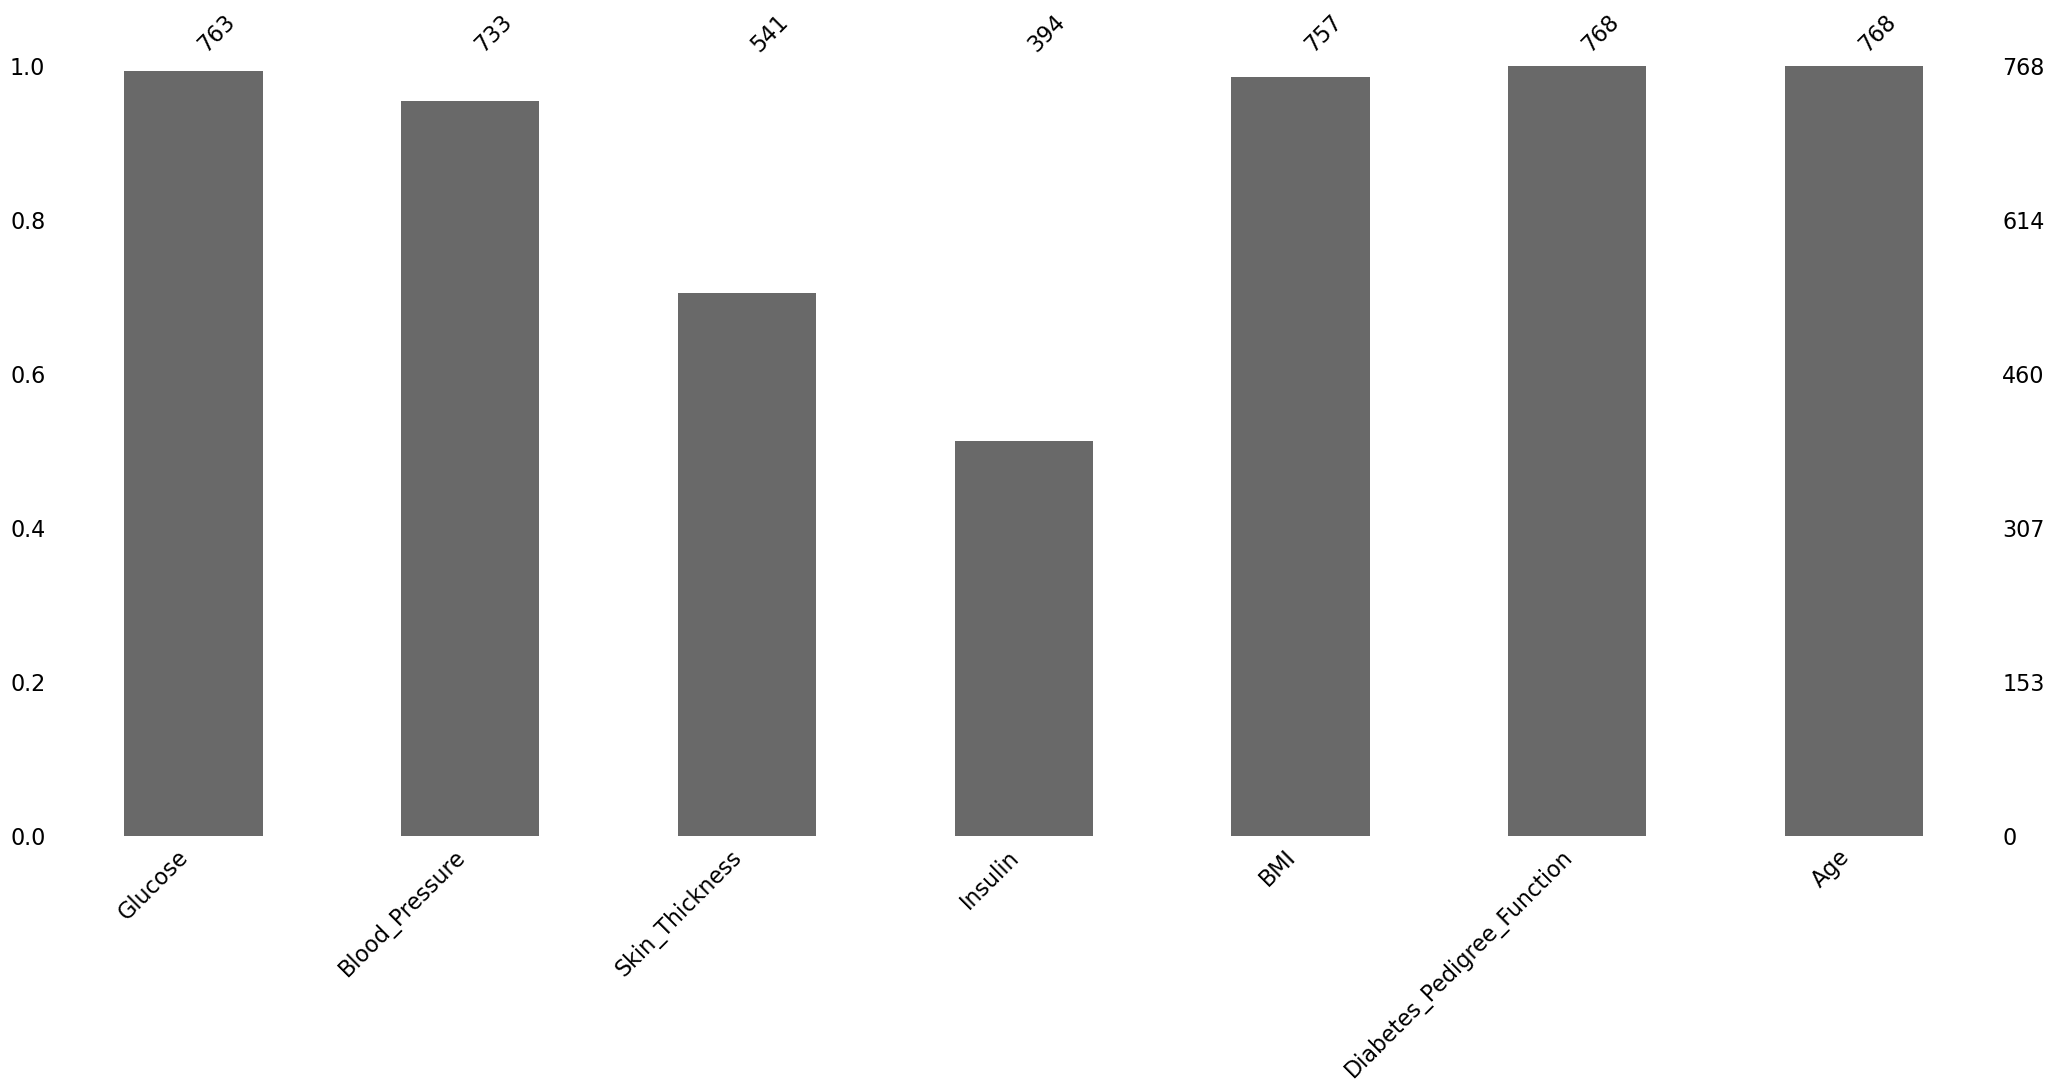

In [65]:
# Used missingno library
# creating bar plot to see the missing values
msno.bar(diabetes_missing_2)

<AxesSubplot:>

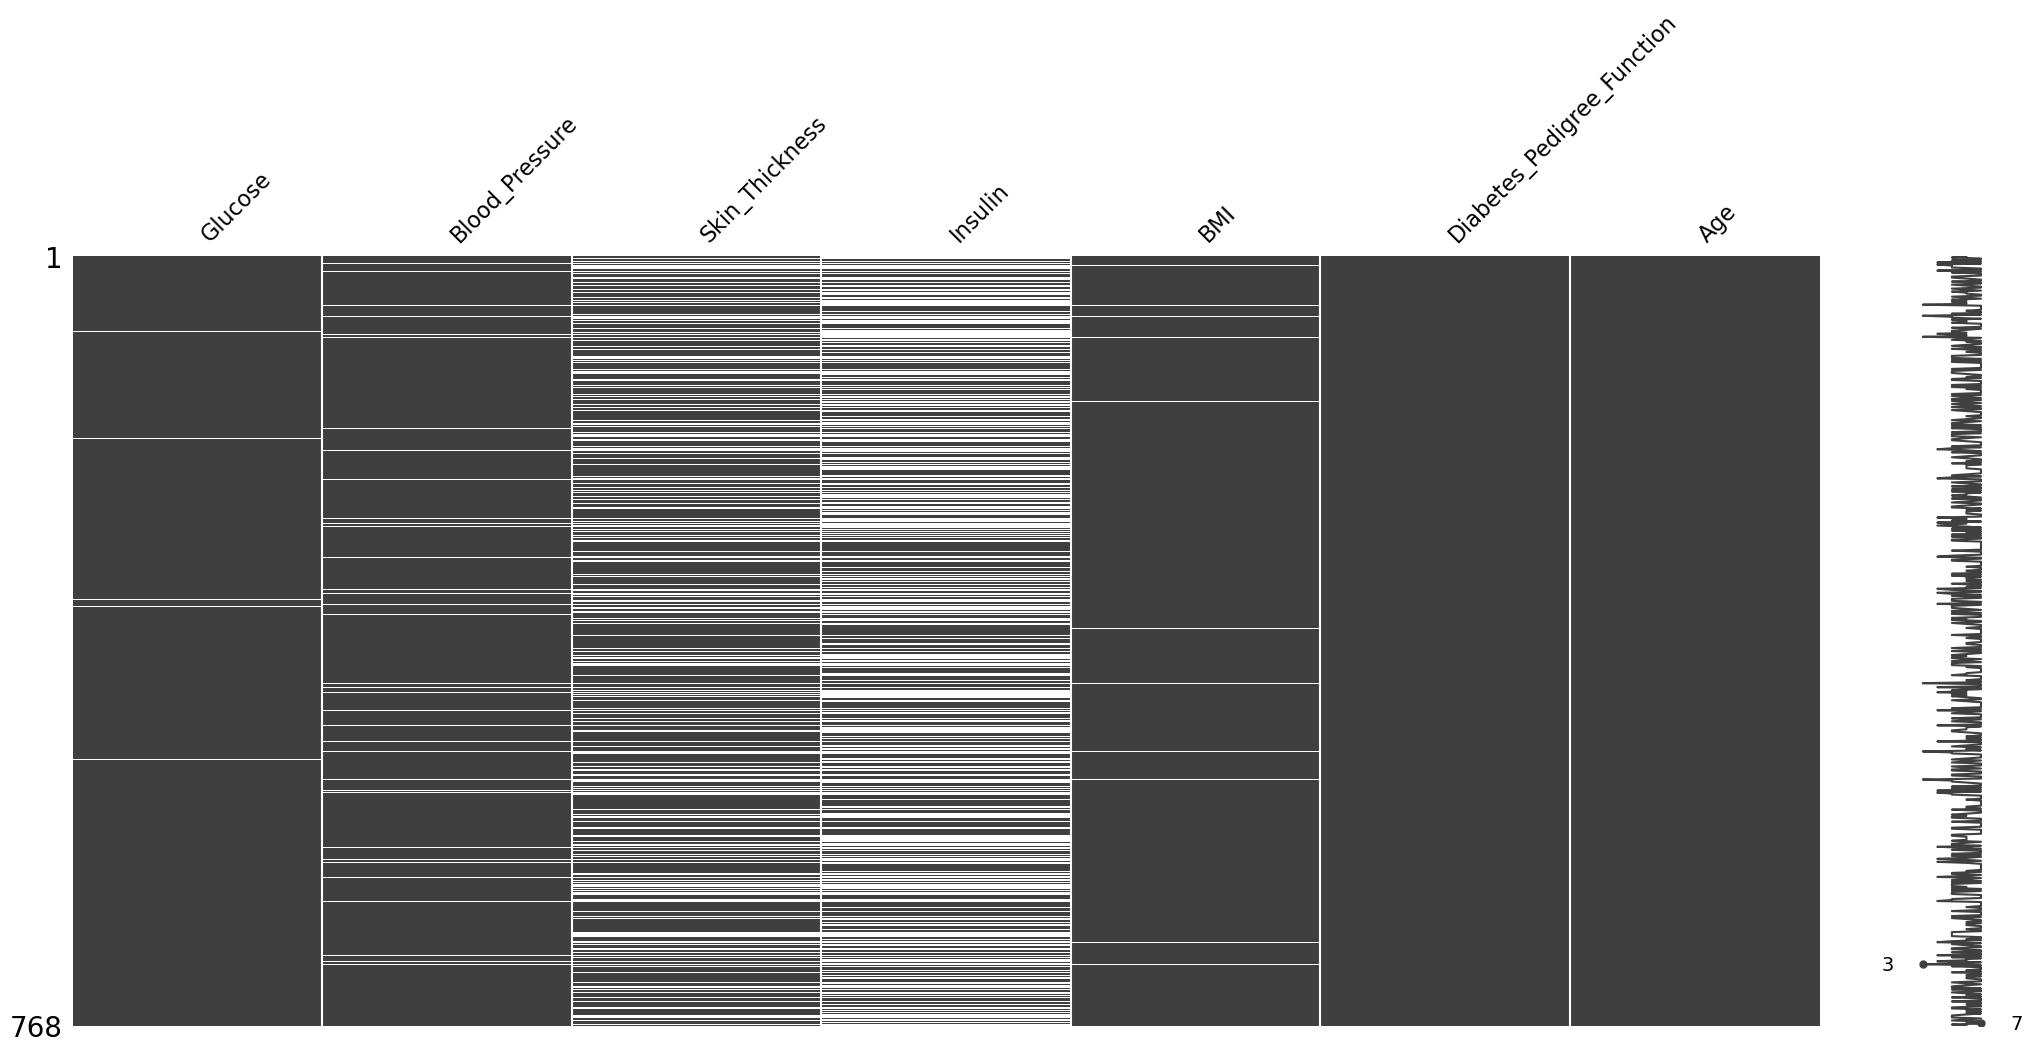

In [66]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(diabetes_missing_2)

<AxesSubplot:>

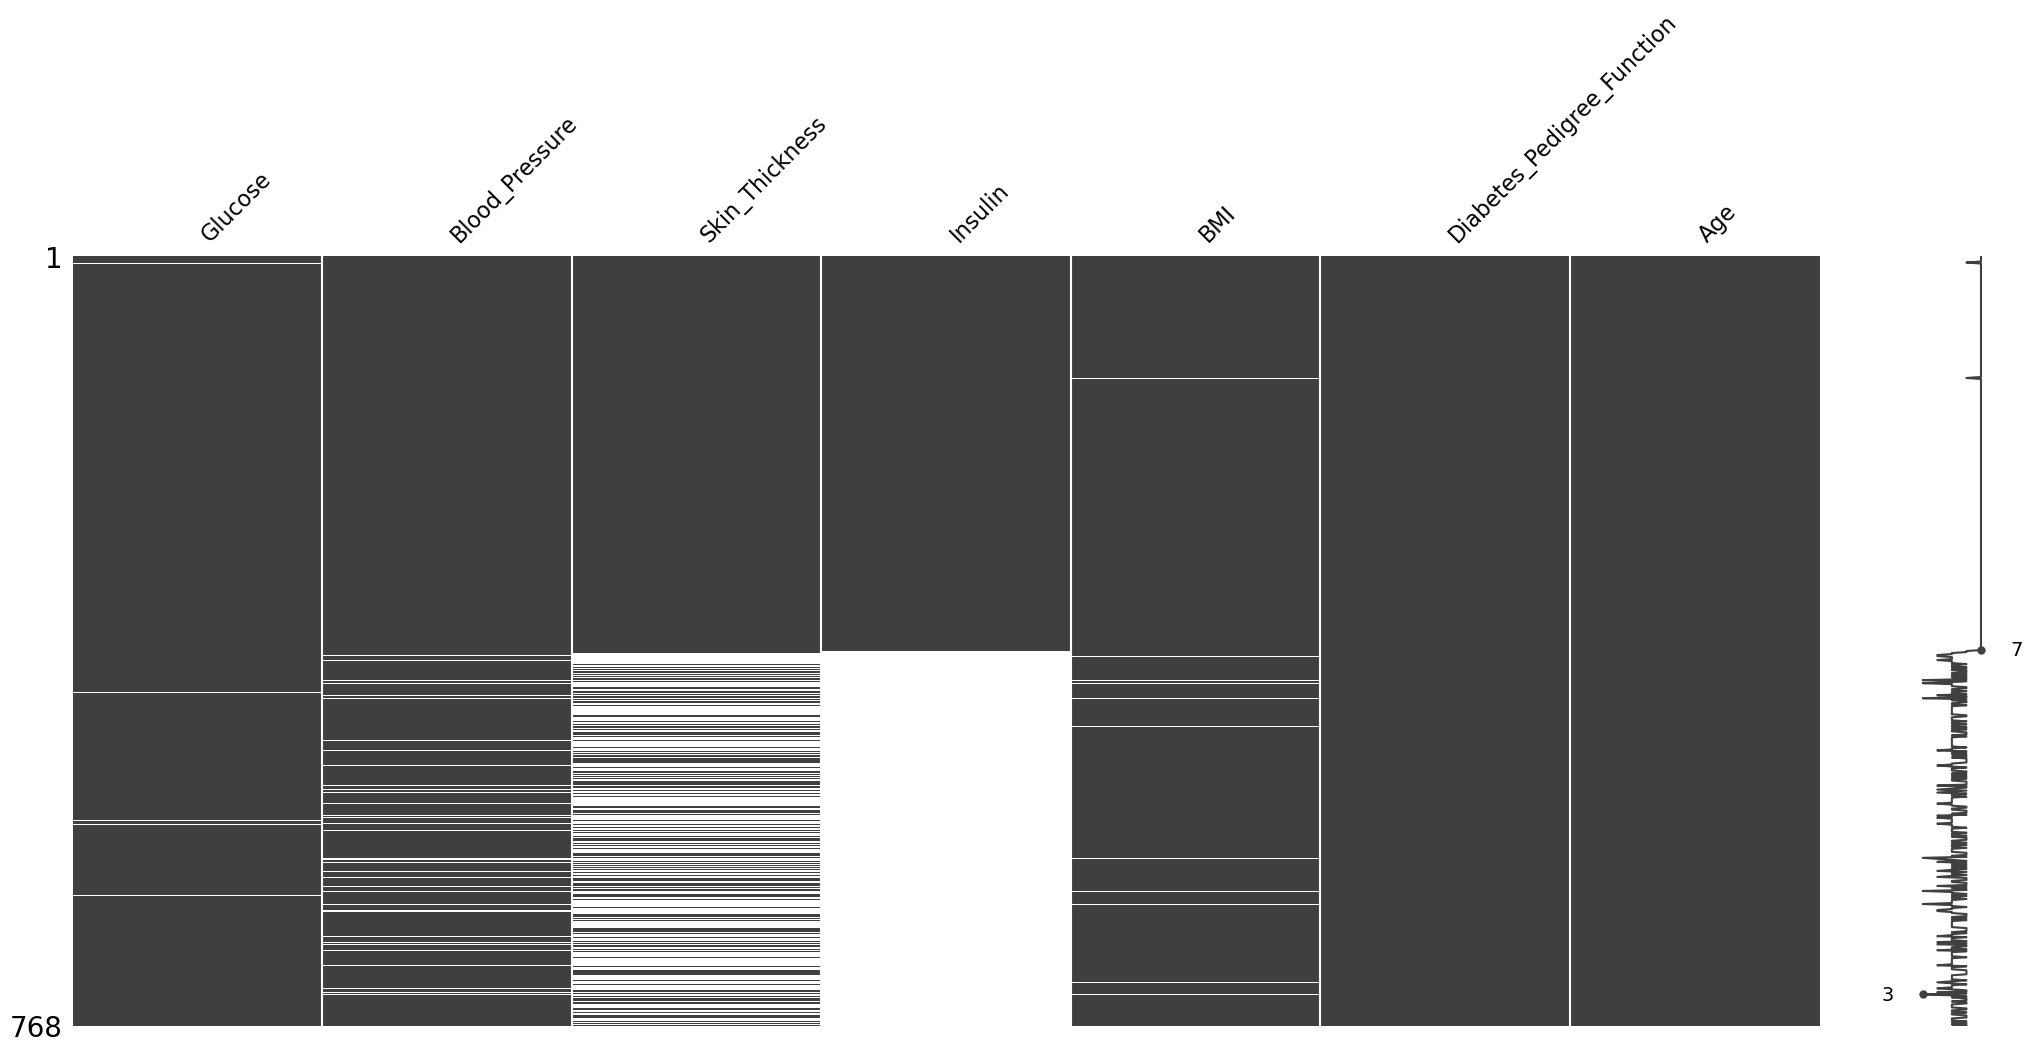

In [67]:
sorted = diabetes_missing_2.sort_values('Insulin')
msno.matrix(sorted)

**It is showing that there is a clear relationship between Skin Thickness and Insulin.**

<AxesSubplot:>

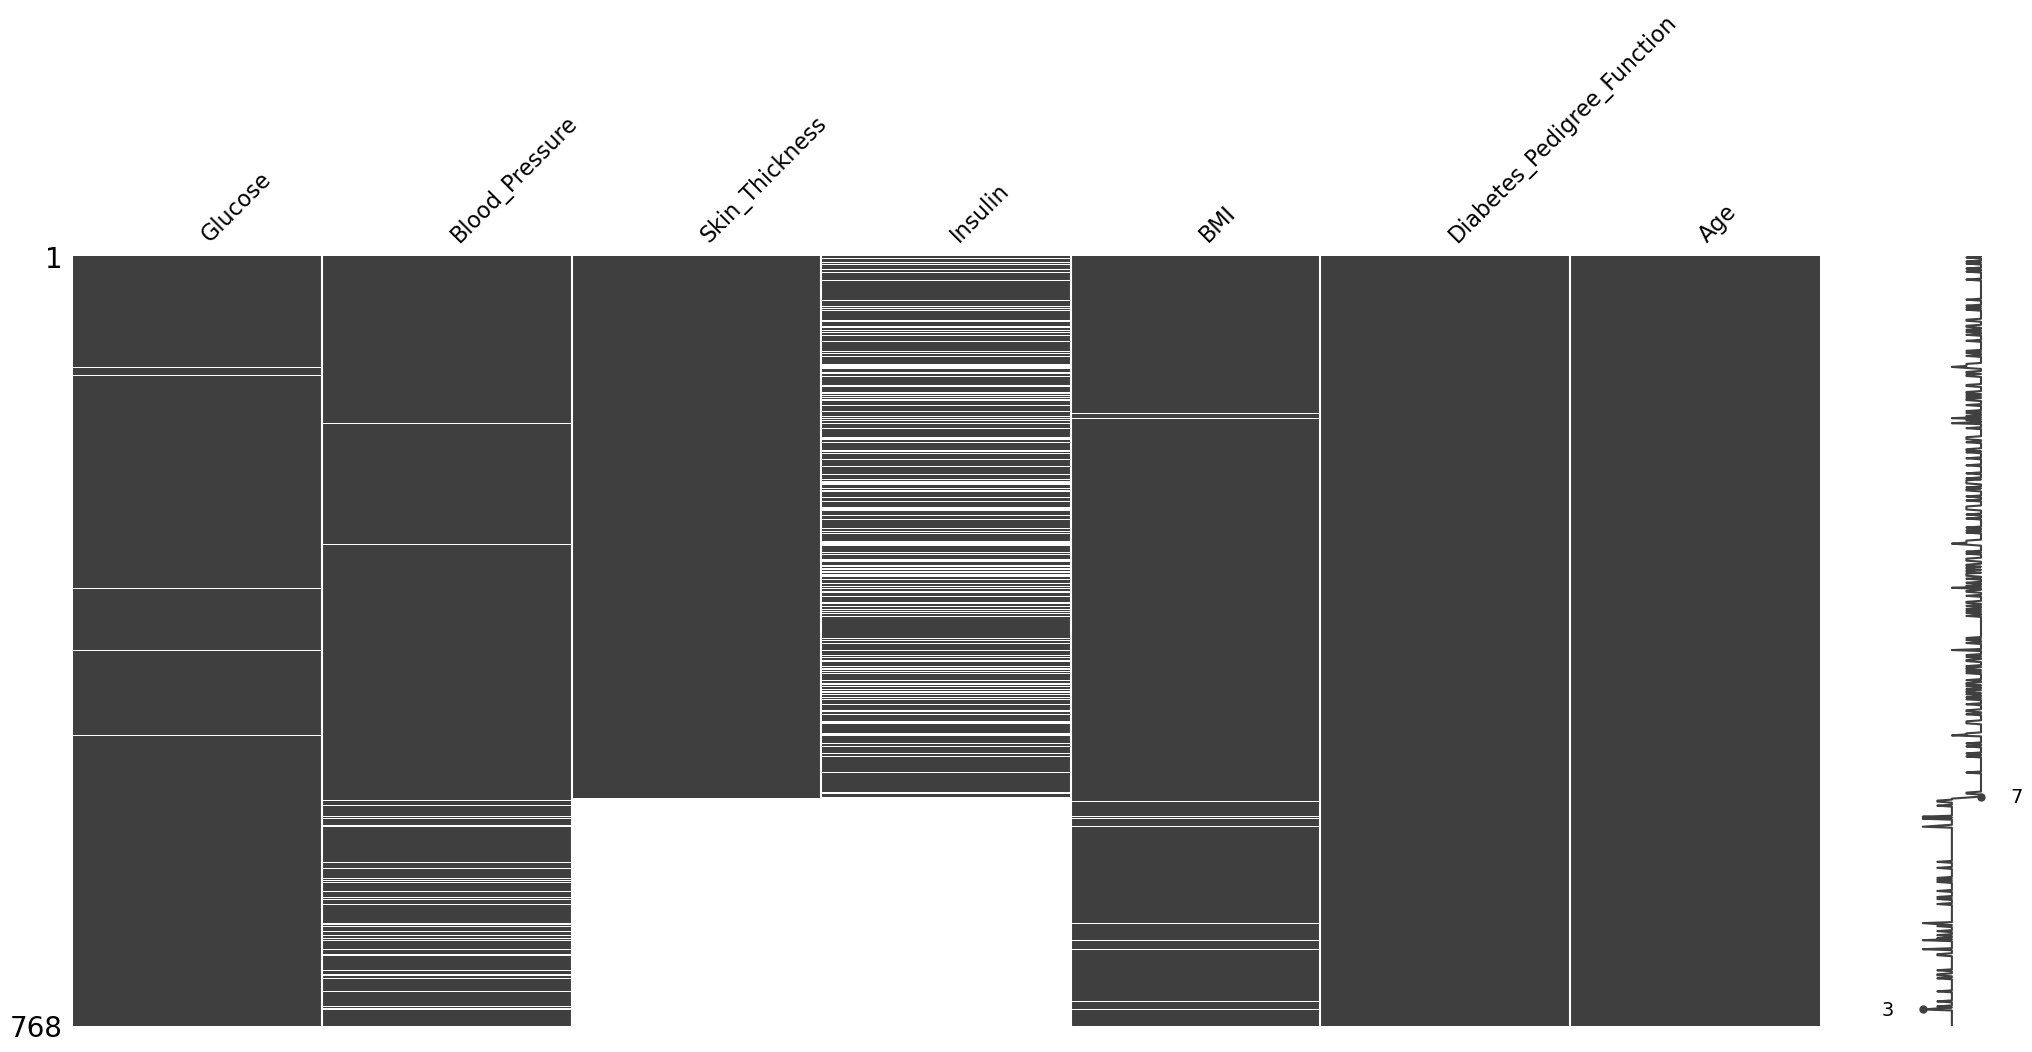

In [68]:
#Sorted the missing values in Skin_Thickness
sorted_1 = diabetes_missing_2.sort_values('Skin_Thickness')
msno.matrix(sorted_1)

**Matrix plot showing that there is a clear relationship between Skin Thickness and Insulin.**

### Finding correlation between missing values

<AxesSubplot:>

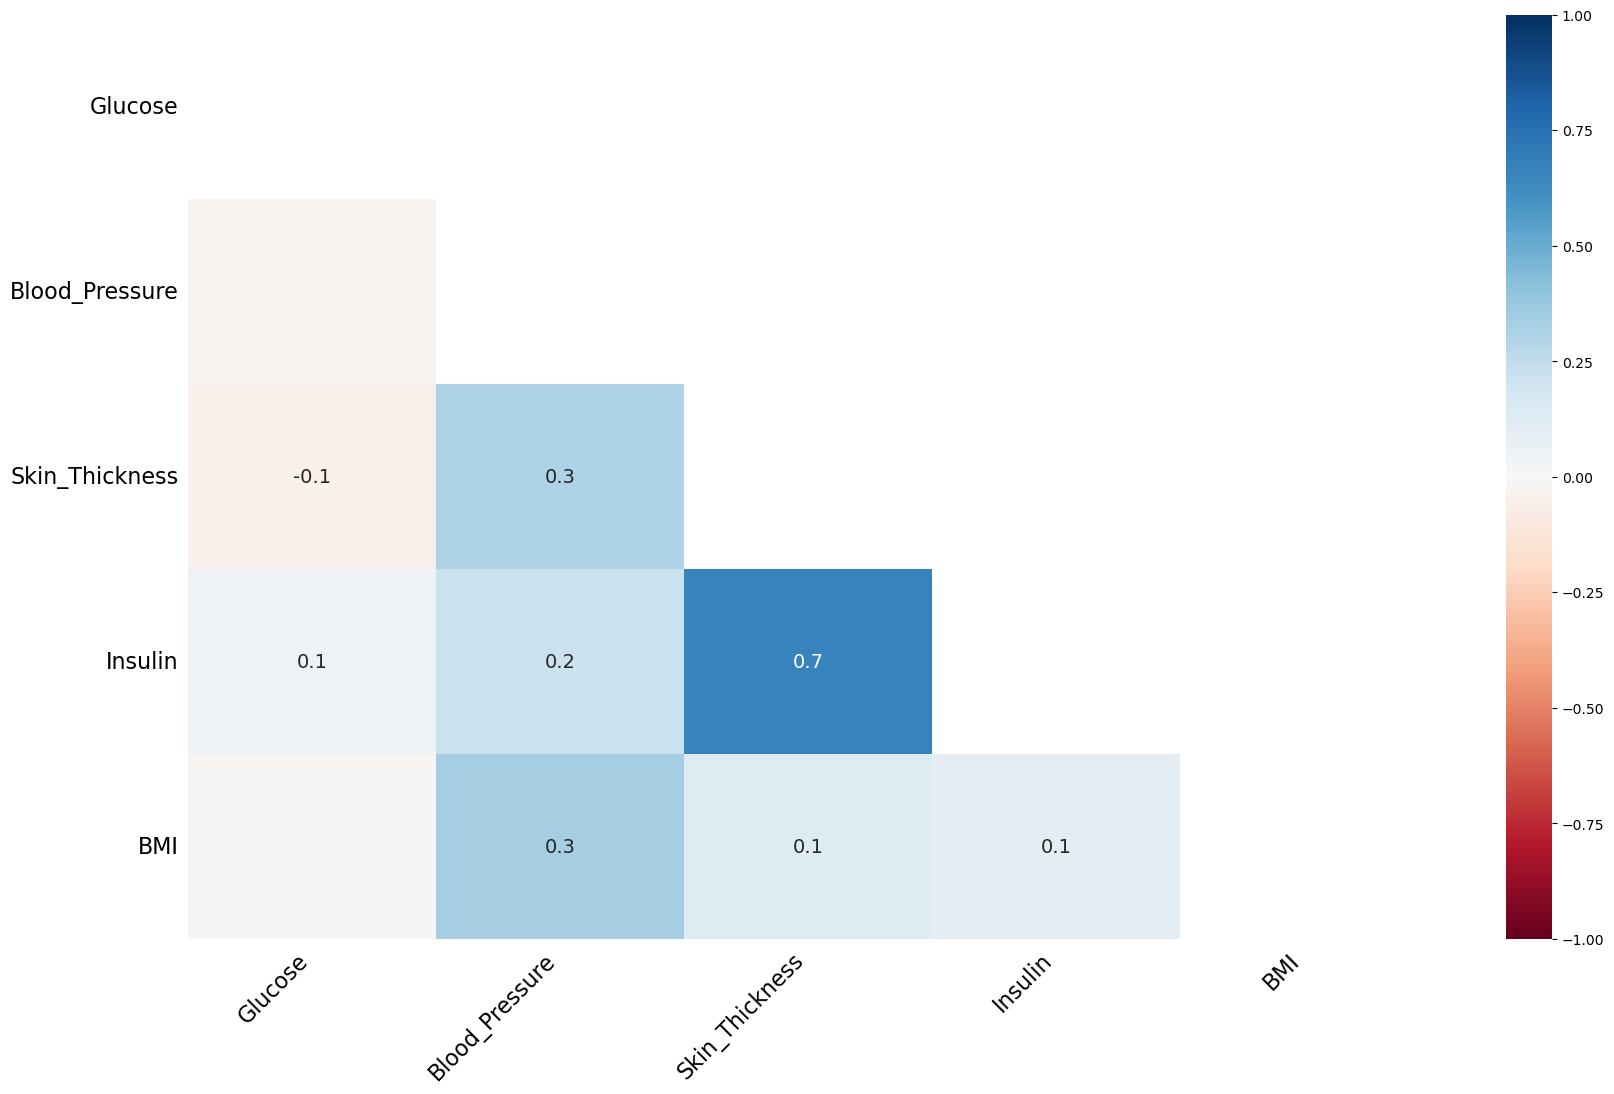

In [69]:
#Using Heatmap of missingno library
msno.heatmap(diabetes_missing_2)

**From Heatmap it is showing that there is a postive correlation between Skin Thickness and Insulin.**

In [70]:
# Using skew function Checking how much data is skewed 
diabetes_missing_2.skew()

Glucose                       0.530989
Blood_Pressure                0.134153
Skin_Thickness                0.690619
Insulin                       2.166464
BMI                           0.593970
Diabetes_Pedigree_Function    1.919911
Age                           1.129597
dtype: float64

In [71]:
diabetes_missing_2

,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,183.0,64.0,NaN,NaN,23.3,0.672,32
3,89.0,66.0,23.0,94.0,28.1,0.167,21
4,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63
764,122.0,70.0,27.0,NaN,36.8,0.340,27
765,121.0,72.0,23.0,112.0,26.2,0.245,30
766,126.0,60.0,NaN,NaN,30.1,0.349,47


**I have used Advance Imputation technique like KNN & MICE for filling missing values**

In [72]:
#Used KNN for filling missing values
from fancyimpute import KNN
knn_imputer = KNN(5)
diabetes_knn = diabetes_missing_2.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.060
Imputing row 101/768 with 2 missing, elapsed time: 0.068
Imputing row 201/768 with 1 missing, elapsed time: 0.069
Imputing row 301/768 with 3 missing, elapsed time: 0.069
Imputing row 401/768 with 2 missing, elapsed time: 0.069
Imputing row 501/768 with 0 missing, elapsed time: 0.069
Imputing row 601/768 with 1 missing, elapsed time: 0.074
Imputing row 701/768 with 0 missing, elapsed time: 0.075


In [73]:
diabetes_knn.head(10)

,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148.0,72.000000,35.000000,160.671042,33.600000,0.627,50.0
1,85.0,66.000000,29.000000,62.269622,26.600000,0.351,31.0
2,183.0,64.000000,24.252395,186.965234,23.300000,0.672,32.0
3,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,116.0,74.000000,19.357863,103.915657,25.600000,0.201,30.0
6,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,115.0,67.457471,29.703773,121.102454,35.300000,0.134,29.0
8,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,125.0,96.000000,24.816857,188.663645,34.041883,0.232,54.0


In [74]:
#Checked for null values
diabetes_knn.isnull().sum()

Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
dtype: int64

**Now We can see there is no any null values**

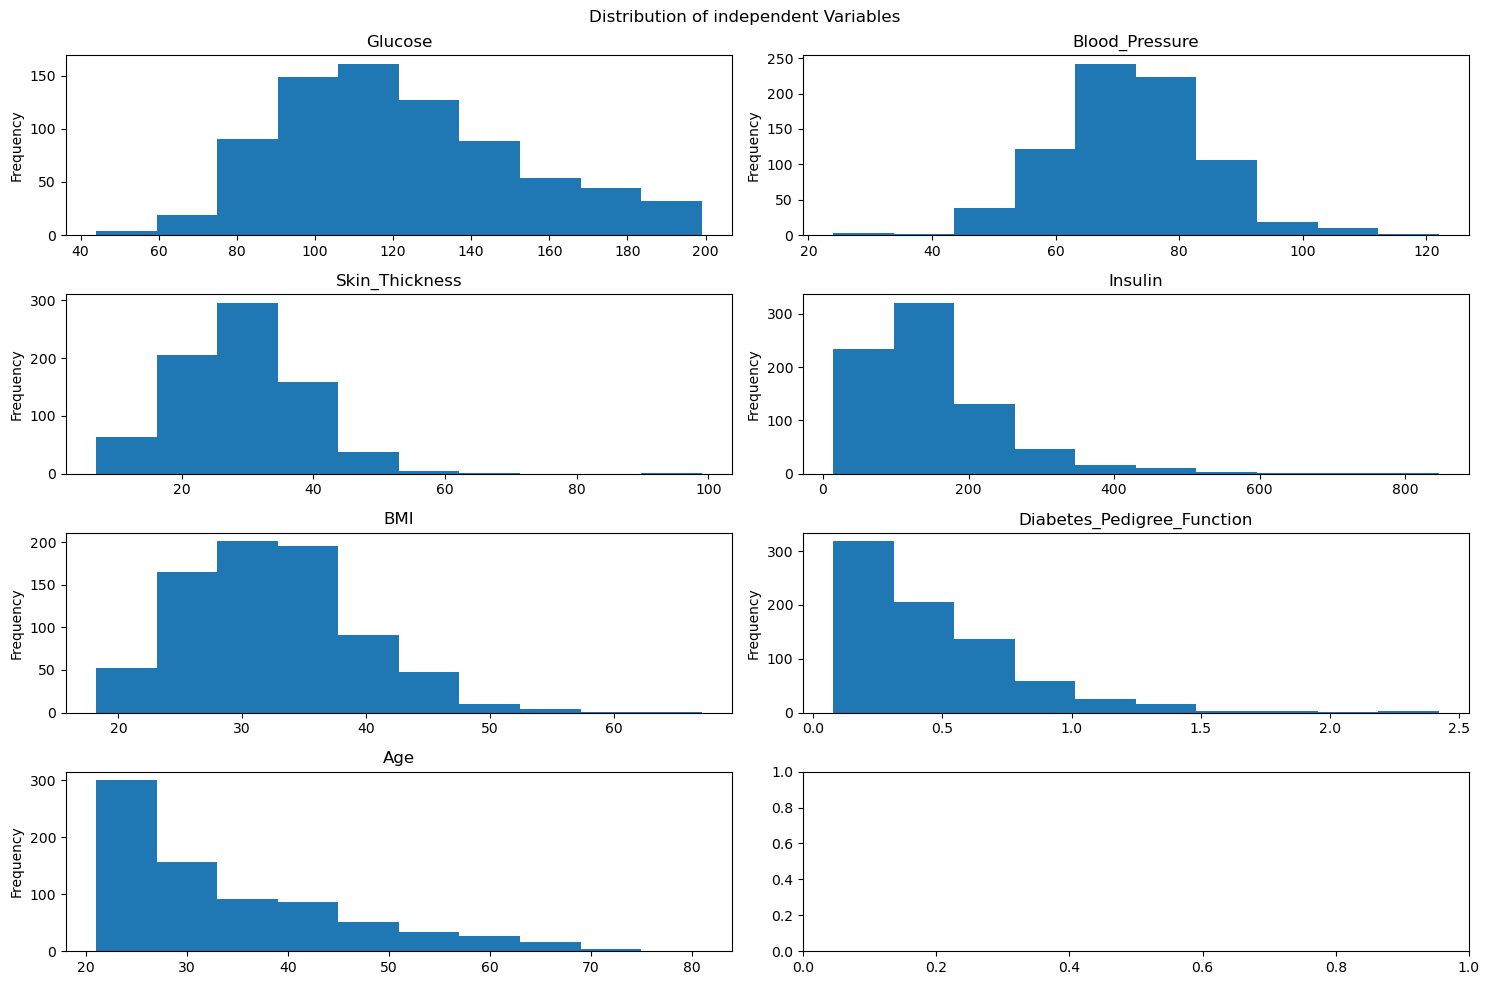

In [75]:
# plotted Histogram after imputation
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
a = 0
columns = diabetes_knn.columns
for col in columns:
    diabetes_knn[col].plot(kind = 'hist', ax = axes[a], title = col)
    a = a +  1

plt.suptitle('Distribution of independent Variables')
plt.tight_layout()
plt.show()

**After Imputing the missing values using KNN method, I observed there is no much more change in the distributions.**

<AxesSubplot:title={'center':'Values after KNN_Imputation'}, xlabel='Skin_Thickness', ylabel='Insulin'>

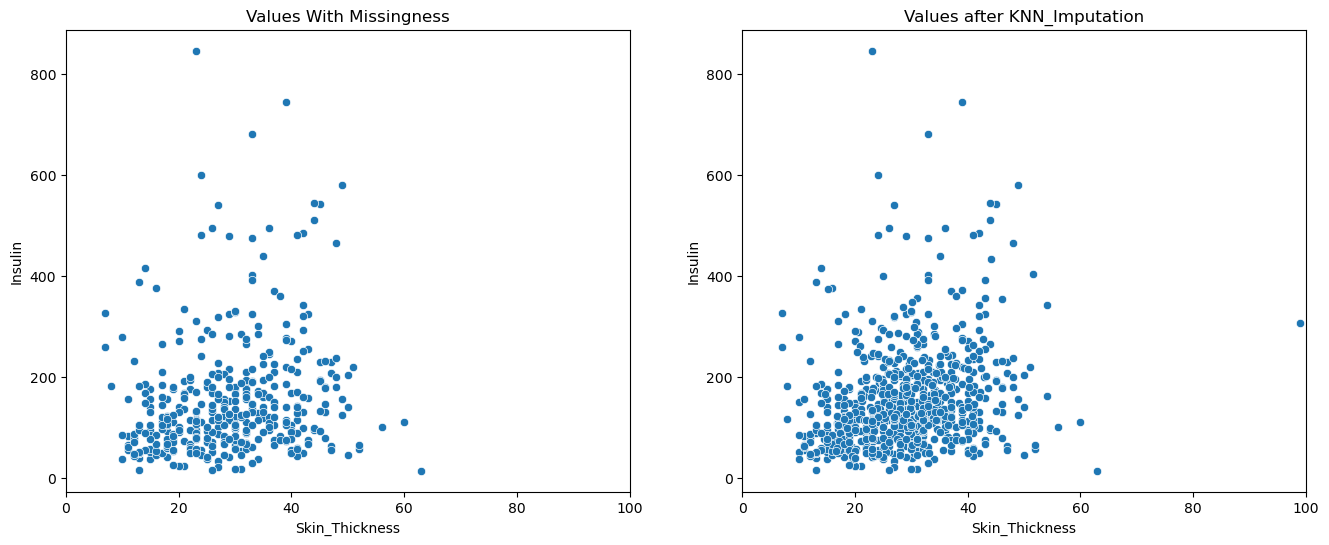

In [76]:
#Plotting Scatterplot using seaborn
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Values With Missingness')
plt.xlim(0,100)
sns.scatterplot(x='Skin_Thickness', y='Insulin', data=diabetes_missing_2, ax=ax1)
ax1.set_xlim([0, 100])


ax2.set_title('Values after KNN_Imputation')
sns.scatterplot(x='Skin_Thickness', y='Insulin', data=diabetes_knn, ax=ax2)

**I compared the relation between Skin_Thickness and Insulin for both Values when it has missingness and Values after KNN imputation.**

In [77]:
#Importing IterativeImputer from fancyImpute for performing MICE technique
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
diabetes_MICE = diabetes_missing_2.copy(deep=True)
diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(diabetes_MICE)

**I also did the imputation using MICE technique.**

In [78]:
diabetes_MICE.head(20)

,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,148.0,72.000000,35.000000,218.240540,33.600000,0.627,50.0
1,85.0,66.000000,29.000000,68.492449,26.600000,0.351,31.0
2,183.0,64.000000,21.149902,271.651735,23.300000,0.672,32.0
3,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,116.0,74.000000,21.935436,126.890078,25.600000,0.201,30.0
6,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,115.0,72.123341,31.072269,141.834307,35.300000,0.134,29.0
8,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,125.0,96.000000,33.089694,159.976329,34.832933,0.232,54.0


<AxesSubplot:title={'center':'Values after MICE Imputation'}, xlabel='Skin_Thickness', ylabel='Insulin'>

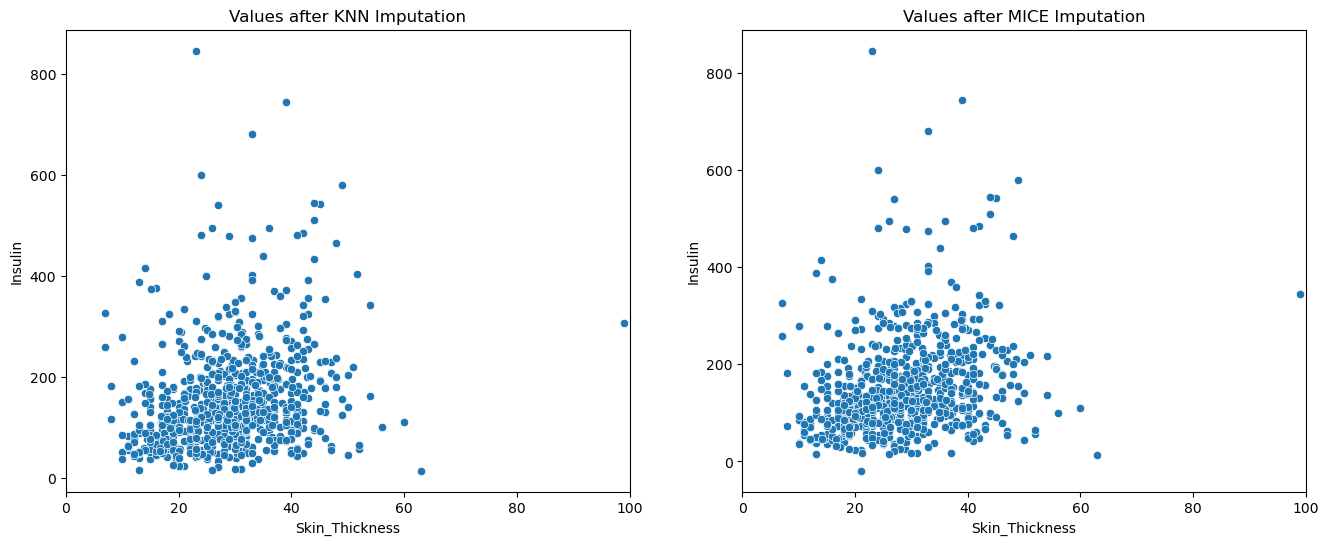

In [79]:
#Plotting Scatterplot 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

ax1.set_title('Values after KNN Imputation')
plt.xlim(0,100)
sns.scatterplot(x='Skin_Thickness', y='Insulin', data=diabetes_knn, ax=ax1)
ax1.set_xlim([0, 100])


ax2.set_title('Values after MICE Imputation')
sns.scatterplot(x='Skin_Thickness', y='Insulin', data=diabetes_MICE, ax=ax2)

**From visualization it is showing that, I am getting approximately the same result using KNN Imputation and Mice Imputation**

In [80]:
# Merged the Pregnancies & Outcome variable with Imputed Variables (variables having missing values)
diabetes_PO = diabetes_1[['Pregnancies','Outcome']]
diabetes_new = diabetes_PO.combine_first(diabetes_knn)
diabetes_new.head(10)

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
0,50.0,33.600000,72.000000,0.627,148.0,160.671042,1,6,35.000000
1,31.0,26.600000,66.000000,0.351,85.0,62.269622,0,1,29.000000
2,32.0,23.300000,64.000000,0.672,183.0,186.965234,1,8,24.252395
3,21.0,28.100000,66.000000,0.167,89.0,94.000000,0,1,23.000000
4,33.0,43.100000,40.000000,2.288,137.0,168.000000,1,0,35.000000
5,30.0,25.600000,74.000000,0.201,116.0,103.915657,0,5,19.357863
6,26.0,31.000000,50.000000,0.248,78.0,88.000000,1,3,32.000000
7,29.0,35.300000,67.457471,0.134,115.0,121.102454,0,10,29.703773
8,53.0,30.500000,70.000000,0.158,197.0,543.000000,1,2,45.000000
9,54.0,34.041883,96.000000,0.232,125.0,188.663645,1,8,24.816857


<AxesSubplot:xlabel='Glucose'>

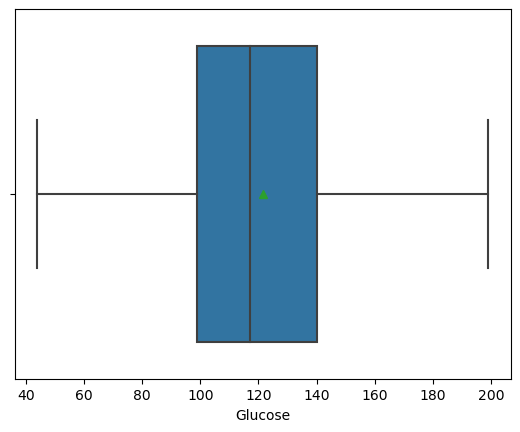

In [81]:
sns.boxplot(diabetes_new["Glucose"], showmeans = True)

## Only Glucose has no outliers

In [82]:
# checked for skewness using skew function
diabetes_new.skew()

Age                           1.129597
BMI                           0.606209
Blood_Pressure                0.137032
Diabetes_Pedigree_Function    1.919911
Glucose                       0.530038
Insulin                       2.102967
Outcome                       0.635017
Pregnancies                   0.901674
Skin_Thickness                0.663026
dtype: float64

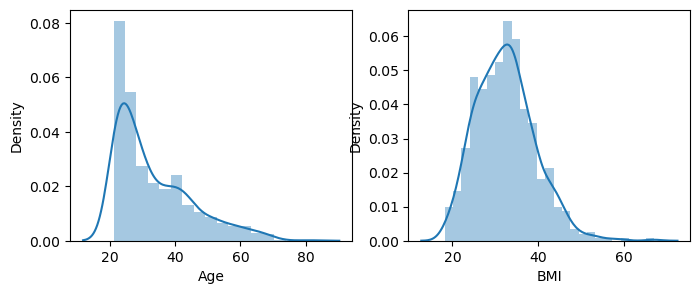

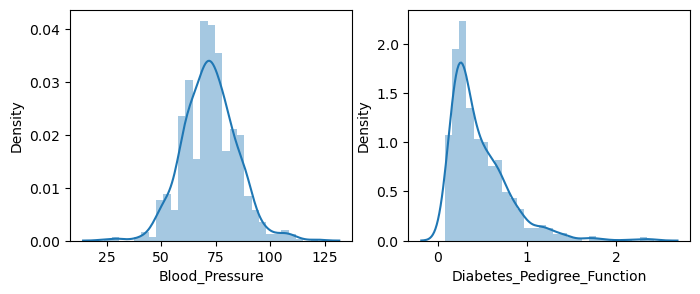

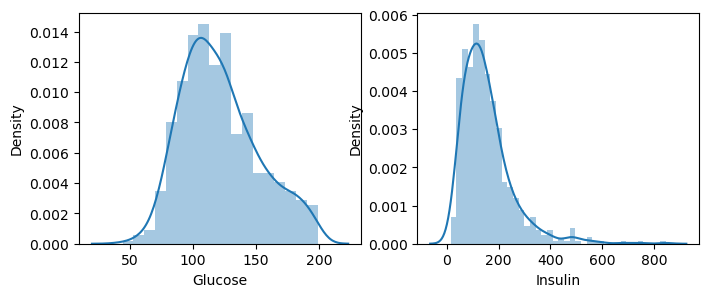

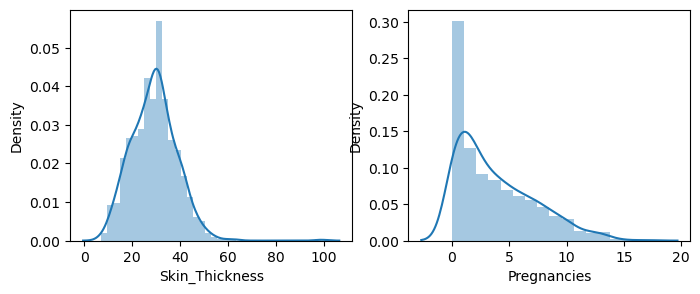

In [83]:
# Using histogram along with density plot i want to see how the distribution
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_new['Age'])

plt.subplot(1,2,2)
sns.distplot(diabetes_new['BMI'])


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_new['Blood_Pressure'])

plt.subplot(1,2,2)
sns.distplot(diabetes_new['Diabetes_Pedigree_Function'])


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_new['Glucose'])

plt.subplot(1,2,2)
sns.distplot(diabetes_new['Insulin'])

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_new['Skin_Thickness'])

plt.subplot(1,2,2)
sns.distplot(diabetes_new['Pregnancies'])

plt.show()

**BMI, Blood_Pressure, Glucose are closel to normally distrbuted**

### Now Findind Outliers and treating

### For Skewed data I have used IQR

In [84]:
# Finding the IQR
percentile_25 = diabetes_new['Age'].quantile(0.25)
percentile_75 = diabetes_new['Age'].quantile(0.75)

In [85]:
percentile_25

24.0

In [86]:
# Calculating IQR
iqr = percentile_75 - percentile_25

In [87]:
# Calculating upper_bound & lower_bound 
upper_bound = percentile_75 + 1.5 * iqr
lower_bound = percentile_25 - 1.5 * iqr

In [88]:
print("Upper bound",upper_bound)
print("Lower bound",lower_bound)

Upper bound 66.5
Lower bound -1.5


### Finding Outliers

In [89]:
diabetes_new[diabetes_new['Age'] > upper_bound]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
123,69.0,26.800000,80.000000,0.186,132.0,207.924428,0,5,25.882347
363,67.0,38.500000,78.000000,0.520,146.0,245.957558,1,4,23.237788
453,72.0,19.600000,82.060734,0.832,119.0,249.646037,0,2,20.362017
459,81.0,25.900000,74.000000,0.460,134.0,60.000000,0,9,33.000000
489,67.0,26.100000,80.000000,0.551,194.0,403.746486,0,8,51.618464
537,67.0,21.700000,60.000000,0.735,57.0,103.031769,0,0,31.152628
666,70.0,32.500000,82.000000,0.235,145.0,172.026225,1,4,18.000000
674,68.0,35.600000,82.000000,0.587,91.0,153.937731,0,8,34.243326
684,69.0,28.469468,82.000000,0.640,136.0,235.578964,0,5,25.389521


**It is showing only those records which is greater than the upper bound**

In [90]:
diabetes_new[diabetes_new['Age'] < lower_bound]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


**It is showing only those records which is smaller than the lower bound, and we can there is no record**

In [91]:
# Made a copy 
new_df_cap = diabetes_new.copy()

new_df_cap['Age'] = np.where(new_df_cap['Age'] > upper_bound,
    upper_bound, np.where(new_df_cap['Age'] < lower_bound,  lower_bound,  new_df_cap['Age']))

In [92]:
new_df_cap.shape

(768, 9)

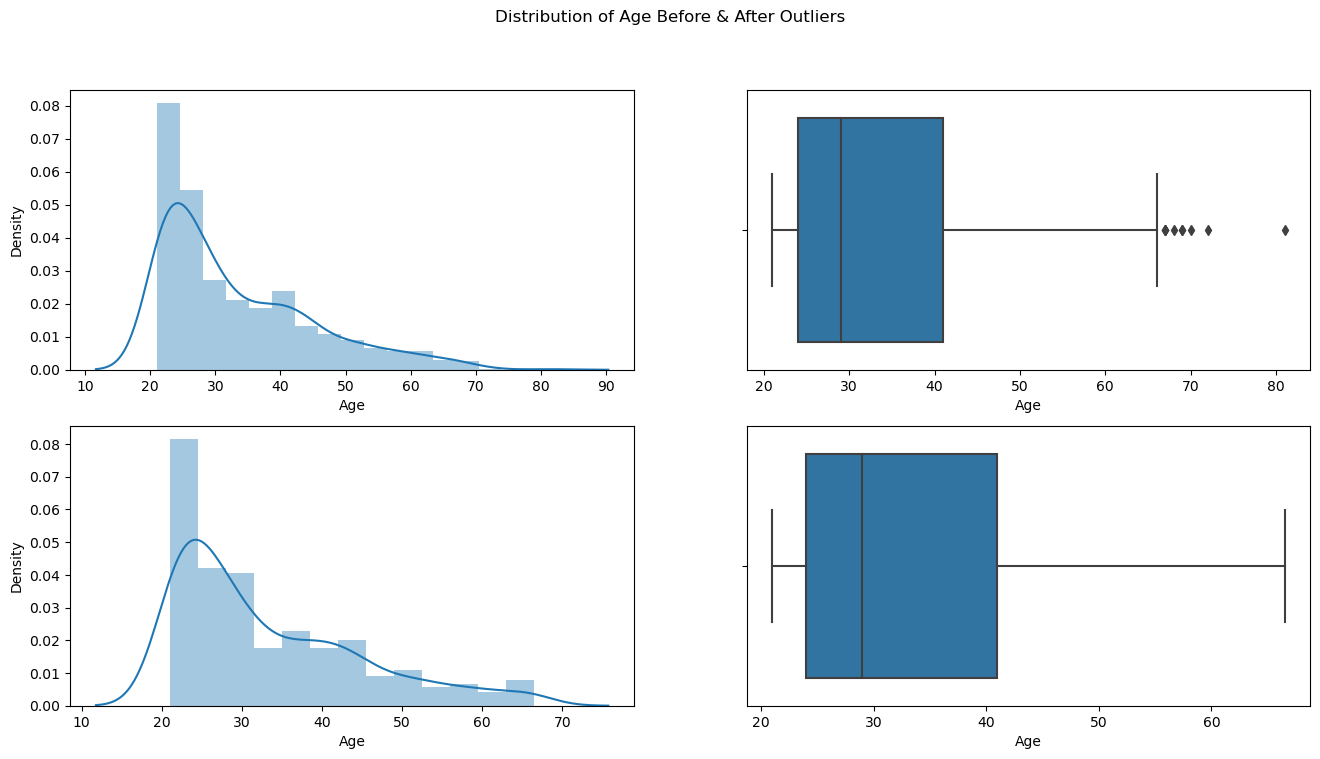

In [93]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Age Before & After Outliers')
sns.distplot(diabetes_new['Age'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Age'])

plt.show()

In [94]:
# Finding the IQR
percentile_25_BMI = diabetes_new['BMI'].quantile(0.25)
percentile_75_BMI = diabetes_new['BMI'].quantile(0.75)

In [95]:
iqr_BMI = percentile_75_BMI - percentile_25_BMI

In [96]:
upper_bound_BMI = percentile_75_BMI + 1.5 * iqr_BMI
lower_bound_BMI = percentile_25_BMI - 1.5 * iqr_BMI

print("Upper bound",upper_bound_BMI)
print("Lower bound",lower_bound_BMI)

Upper bound 50.25
Lower bound 13.849999999999998


### Finding Outlier

In [97]:
diabetes_new[diabetes_new['BMI'] > upper_bound_BMI]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
120,25.0,53.2,76.0000,0.759,162.0,100.000000,1,0,56.000000
125,26.0,55.0,30.0000,0.496,88.0,99.000000,1,1,42.000000
177,26.0,67.1,110.0000,0.319,129.0,130.000000,1,0,46.000000
193,40.0,52.3,91.7896,0.578,135.0,242.452676,1,11,37.261584
247,23.0,52.3,90.0000,0.427,165.0,680.000000,0,0,33.000000
303,28.0,52.9,98.0000,0.209,115.0,217.245895,1,5,42.364162
445,25.0,59.4,78.0000,2.420,180.0,14.000000,1,0,63.000000
673,22.0,57.3,100.0000,0.880,123.0,240.000000,0,3,35.000000


In [98]:
diabetes_new[diabetes_new['BMI'] < lower_bound_BMI]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


In [99]:

new_df_cap['BMI'] = np.where(new_df_cap['BMI'] > upper_bound_BMI,
    upper_bound_BMI, np.where(new_df_cap['BMI'] < lower_bound_BMI,  lower_bound_BMI,  new_df_cap['BMI']))

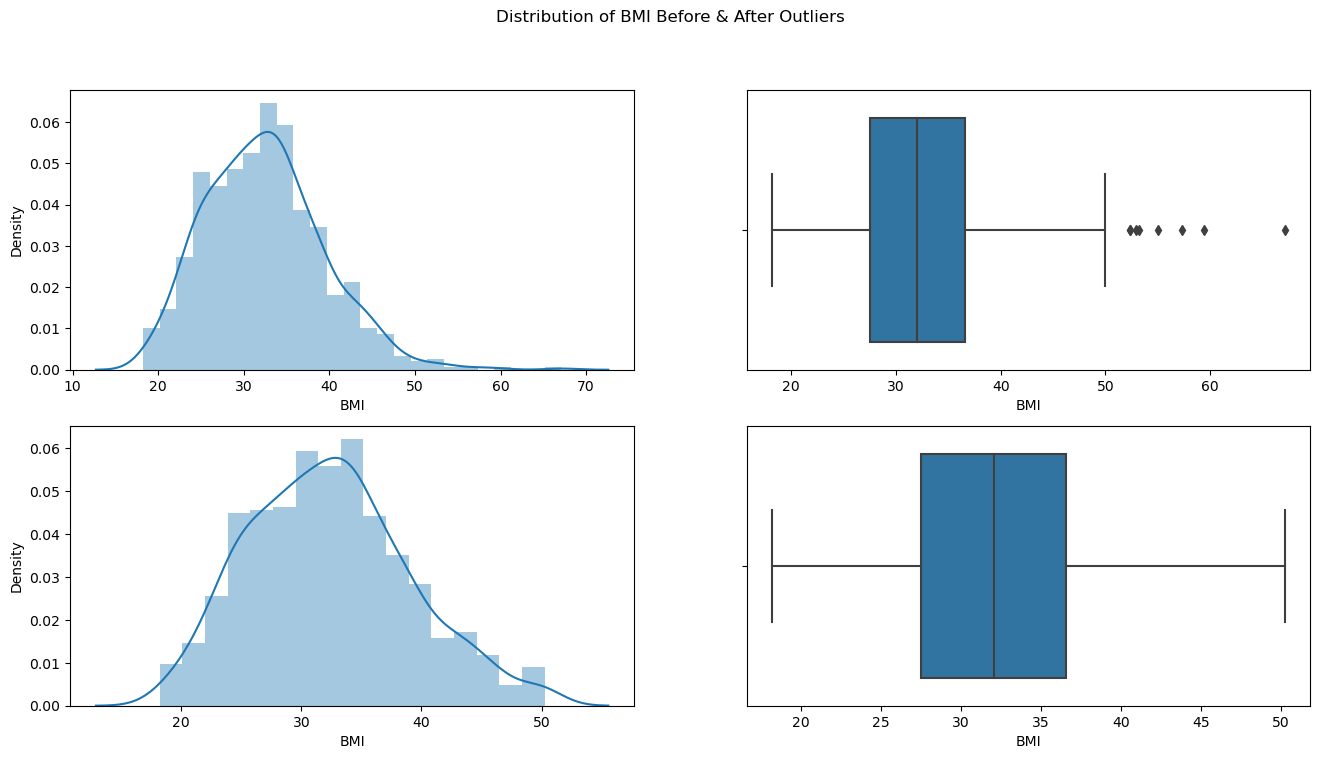

In [100]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of BMI Before & After Outliers')
sns.distplot(diabetes_new['BMI'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['BMI'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['BMI'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['BMI'])

plt.show()

In [101]:
# Finding the IQR
percentile_25_DPF = diabetes_new['Diabetes_Pedigree_Function'].quantile(0.25)
percentile_75_DPF = diabetes_new['Diabetes_Pedigree_Function'].quantile(0.75)

In [102]:
iqr_DPF = percentile_75_DPF - percentile_25_DPF

In [103]:
upper_bound_DPF = percentile_75_DPF + 1.5 * iqr_DPF
lower_bound_DPF = percentile_25_DPF - 1.5 * iqr_DPF

print("Upper bound",upper_bound_DPF)
print("Lower bound",lower_bound_DPF)

Upper bound 1.2
Lower bound -0.32999999999999996


### Finding Outliers

In [104]:
diabetes_new[diabetes_new['Diabetes_Pedigree_Function'] > upper_bound_DPF]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
4,33.0,43.100000,40.0,2.288,137.0,168.000000,1,0,35.000000
12,57.0,27.100000,80.0,1.441,139.0,198.753745,0,10,23.807862
39,56.0,37.100000,72.0,1.390,111.0,207.000000,1,4,47.000000
45,25.0,42.000000,66.0,1.893,180.0,371.422738,1,0,39.000000
58,44.0,40.500000,82.0,1.781,146.0,169.610128,0,0,42.166566
100,33.0,39.000000,72.0,1.222,163.0,289.369475,1,1,31.182938
147,34.0,30.500000,64.0,1.400,106.0,119.000000,0,2,35.000000
187,33.0,32.000000,98.0,1.321,128.0,58.000000,1,1,41.000000
218,32.0,29.000000,74.0,1.224,85.0,61.683600,1,5,22.000000
228,31.0,36.700000,70.0,2.329,197.0,744.000000,0,4,39.000000


In [105]:
diabetes_new[diabetes_new['Diabetes_Pedigree_Function'] < lower_bound_DPF]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


In [106]:
new_df_cap['Diabetes_Pedigree_Function'] = np.where(new_df_cap['Diabetes_Pedigree_Function'] > upper_bound_DPF,
    upper_bound_DPF, np.where(new_df_cap['Diabetes_Pedigree_Function'] <
                              lower_bound_DPF,  lower_bound_DPF,  new_df_cap['Diabetes_Pedigree_Function']))

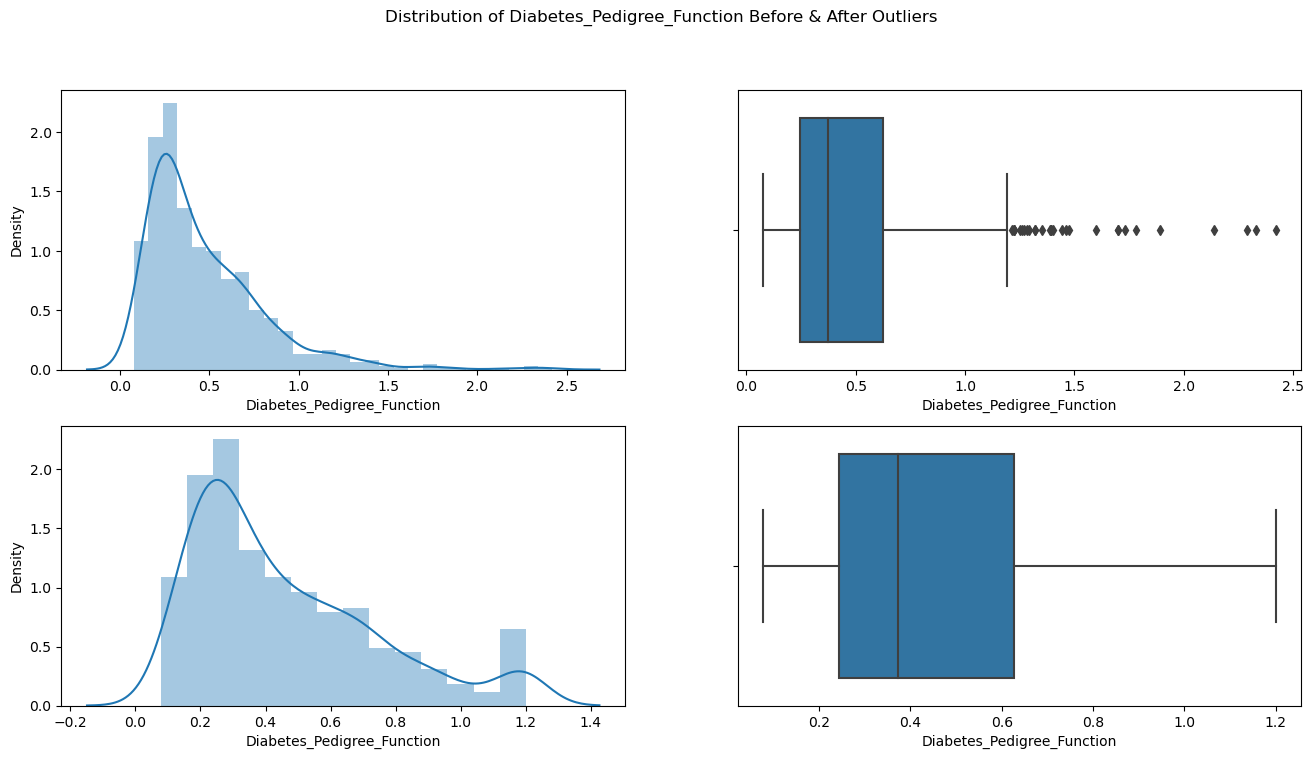

In [107]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Diabetes_Pedigree_Function Before & After Outliers')
sns.distplot(diabetes_new['Diabetes_Pedigree_Function'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Diabetes_Pedigree_Function'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Diabetes_Pedigree_Function'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Diabetes_Pedigree_Function'])

plt.show()

In [108]:
# Finding the IQR
percentile_25_Insulin = diabetes_new['Insulin'].quantile(0.25)
percentile_75_Insulin = diabetes_new['Insulin'].quantile(0.75)

In [109]:
iqr_Insulin = percentile_75_Insulin - percentile_25_Insulin

In [110]:
upper_bound_Insulin = percentile_75_Insulin + 1.5 * iqr_Insulin
lower_bound_Insulin = percentile_25_Insulin - 1.5 * iqr_Insulin

print("Upper bound",upper_bound_Insulin)
print("Lower bound",lower_bound_Insulin)

Upper bound 343.92551521706486
Lower bound -66.54252536177476


### Finding Outliers

In [111]:
diabetes_new[diabetes_new['Insulin'] > upper_bound_Insulin]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
8,53.0,30.5,70.0,0.158,197.0,543.000000,1,2,45.000000
13,59.0,30.1,60.0,0.398,189.0,846.000000,1,1,23.000000
45,25.0,42.0,66.0,1.893,180.0,371.422738,1,0,39.000000
111,46.0,34.0,62.0,0.543,155.0,495.000000,1,8,26.000000
153,23.0,40.6,82.0,0.687,153.0,485.000000,0,1,42.000000
186,60.0,30.1,68.0,0.615,181.0,495.000000,1,8,36.000000
220,21.0,34.6,60.0,1.072,177.0,478.000000,1,0,29.000000
228,31.0,36.7,70.0,2.329,197.0,744.000000,0,4,39.000000
231,46.0,46.2,80.0,0.238,134.0,370.000000,1,6,37.000000
235,26.0,43.6,72.0,0.479,171.0,432.547249,1,4,44.088241


In [112]:
diabetes_new[diabetes_new['Insulin'] < lower_bound_Insulin]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


In [113]:
new_df_cap['Insulin'] = np.where(new_df_cap['Insulin'] > upper_bound_Insulin,
    upper_bound_Insulin, np.where(new_df_cap['Insulin'] <
                              lower_bound_Insulin,  lower_bound_Insulin,  new_df_cap['Insulin']))

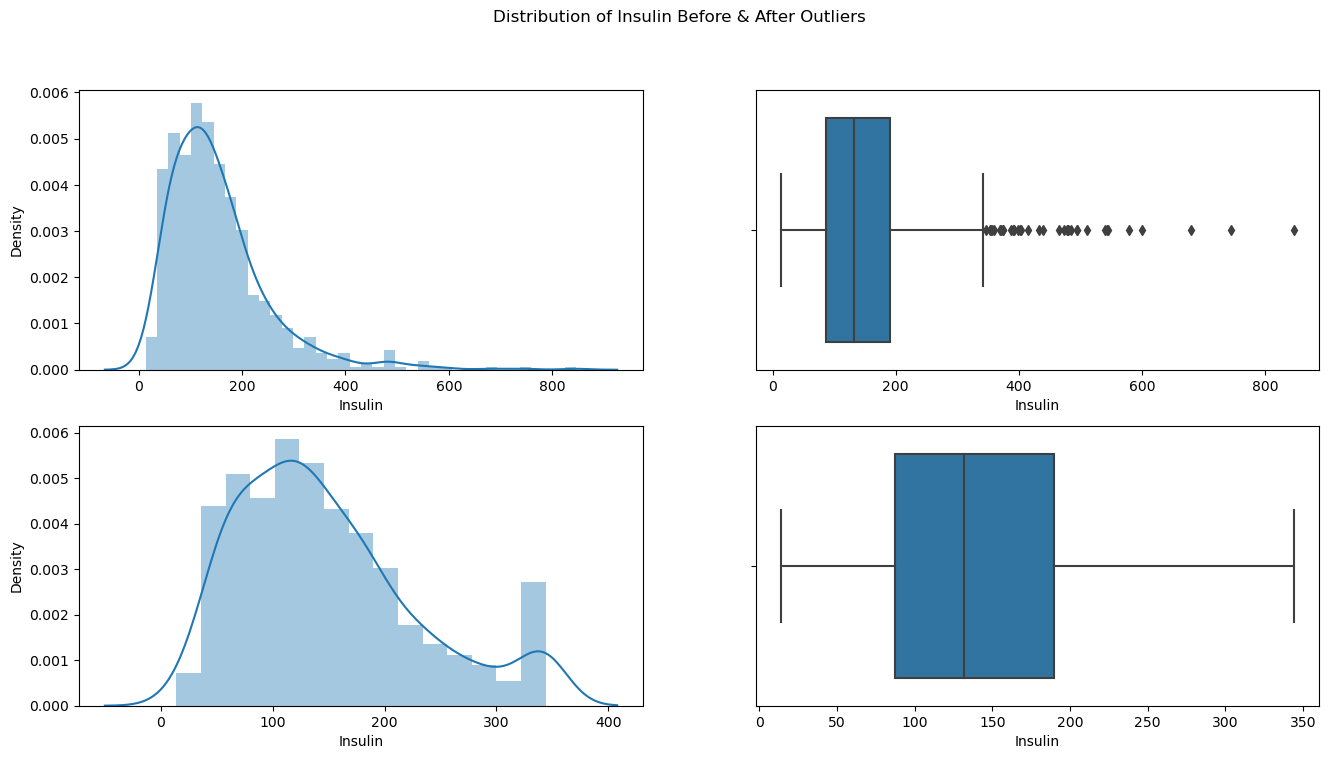

In [114]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Insulin Before & After Outliers')
sns.distplot(diabetes_new['Insulin'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Insulin'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Insulin'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Insulin'])

plt.show()

In [115]:
# Finding the IQR
percentile_25_preg = diabetes_new['Pregnancies'].quantile(0.25)
percentile_75_preg = diabetes_new['Pregnancies'].quantile(0.75)

In [116]:
iqr_preg = percentile_75_preg - percentile_25_preg

In [117]:
upper_bound_preg = percentile_75_preg + 1.5 * iqr_preg
lower_bound_preg = percentile_25_preg - 1.5 * iqr_preg

print("Upper bound",upper_bound_preg)
print("Lower bound",lower_bound_preg)

Upper bound 13.5
Lower bound -6.5


### Finding Outliers

In [118]:
diabetes_new[diabetes_new['Pregnancies'] > upper_bound_preg]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
88,43.0,37.1,70.0,0.153,136.0,110.000000,1,15,32.0
159,47.0,40.9,72.0,0.817,163.0,114.000000,1,17,41.0
298,46.0,36.6,78.0,0.412,100.0,184.000000,1,14,25.0
455,38.0,33.6,62.0,0.212,175.0,174.932818,1,14,30.0


In [119]:
diabetes_new[diabetes_new['Pregnancies'] < lower_bound_preg]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


In [120]:
new_df_cap['Pregnancies'] = np.where(new_df_cap['Pregnancies'] > upper_bound_preg,
    upper_bound_preg, np.where(new_df_cap['Pregnancies'] <
                              lower_bound_preg,  lower_bound_preg,  new_df_cap['Pregnancies']))

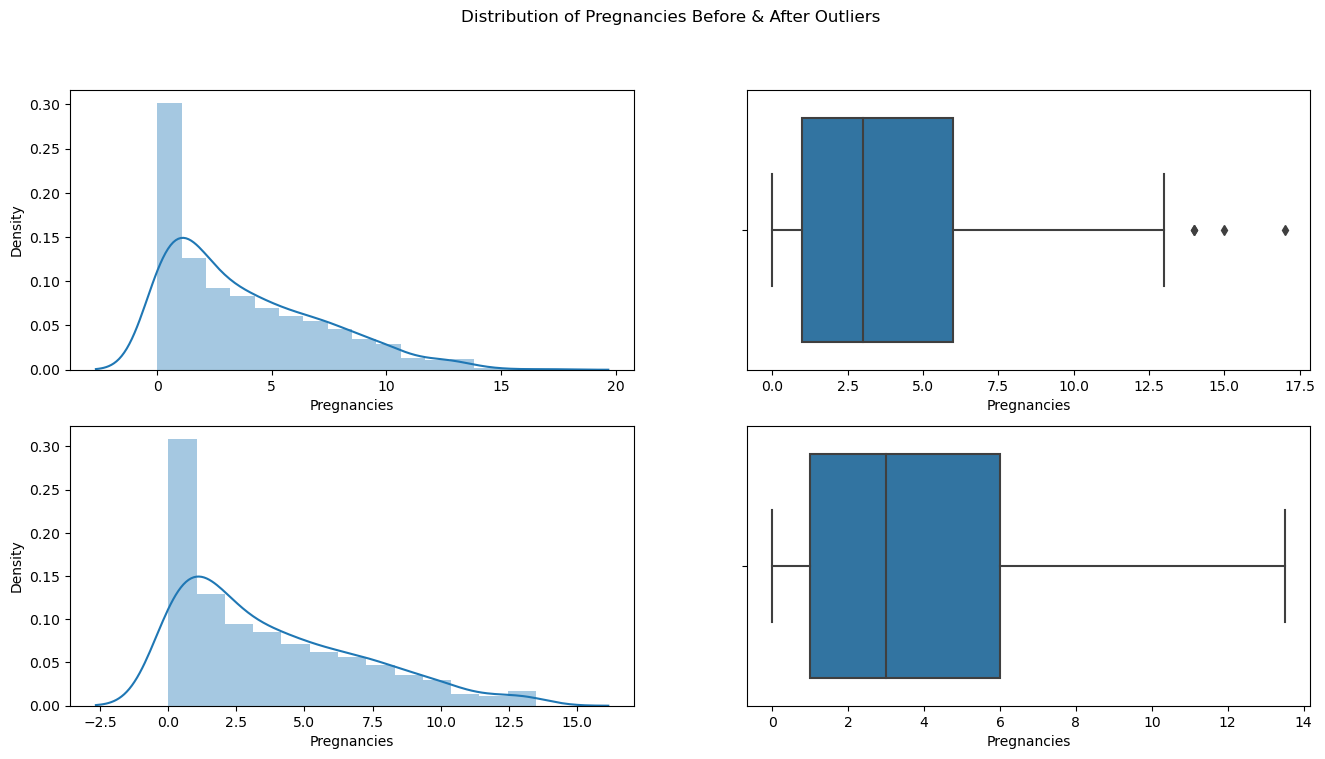

In [121]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Pregnancies Before & After Outliers')
sns.distplot(diabetes_new['Pregnancies'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Pregnancies'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Pregnancies'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Pregnancies'])

plt.show()

In [122]:
# Finding the IQR
percentile_25_ST = diabetes_new['Skin_Thickness'].quantile(0.25)
percentile_75_ST = diabetes_new['Skin_Thickness'].quantile(0.75)

In [123]:
iqr_ST = percentile_75_ST - percentile_25_ST

In [124]:
upper_bound_ST = percentile_75_ST + 1.5 * iqr_ST
lower_bound_ST = percentile_25_ST - 1.5 * iqr_ST

print("Upper bound",upper_bound_ST)
print("Lower bound",lower_bound_ST)

Upper bound 53.03766904231388
Lower bound 4.937218262810195


### Finding Outliers

In [125]:
diabetes_new[diabetes_new['Skin_Thickness'] > upper_bound_ST]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
57,31.0,46.8,88.0,0.962,100.0,110.000000,0,0,60.0
86,45.0,36.6,72.0,0.178,106.0,160.797567,0,13,54.0
120,25.0,53.2,76.0,0.759,162.0,100.000000,1,0,56.0
211,24.0,42.8,85.0,0.375,147.0,342.498013,0,0,54.0
445,25.0,59.4,78.0,2.420,180.0,14.000000,1,0,63.0
579,62.0,34.7,70.0,0.575,197.0,306.611876,1,2,99.0


In [126]:
diabetes_new[diabetes_new['Skin_Thickness'] < lower_bound_ST]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness


In [127]:
new_df_cap['Skin_Thickness'] = np.where(new_df_cap['Skin_Thickness'] > upper_bound_ST,
    upper_bound_ST, np.where(new_df_cap['Skin_Thickness'] <
                              lower_bound_ST,  lower_bound_ST,  new_df_cap['Skin_Thickness']))

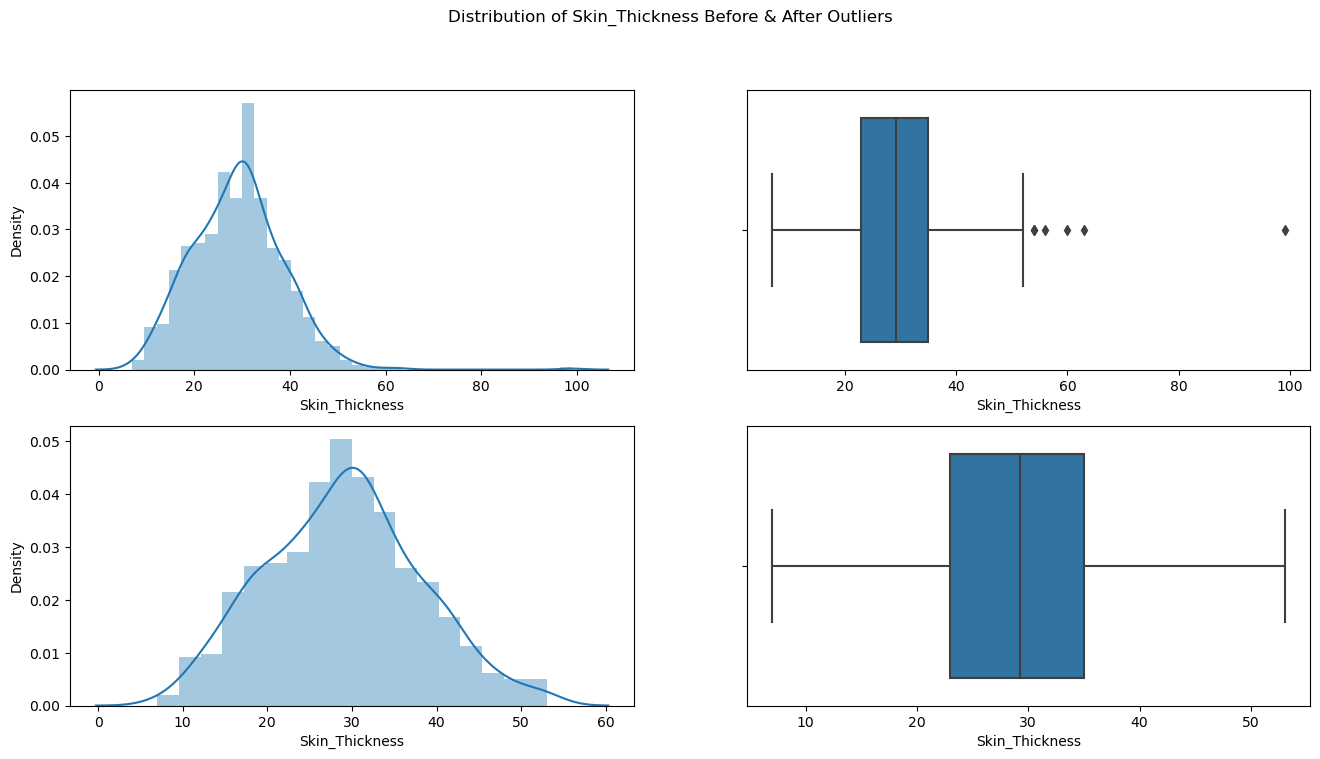

In [128]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Skin_Thickness Before & After Outliers')
sns.distplot(diabetes_new['Skin_Thickness'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Skin_Thickness'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Skin_Thickness'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Skin_Thickness'])

plt.show()

In [129]:
# Finding the IQR
percentile_25_BP = diabetes_new['Blood_Pressure'].quantile(0.25)
percentile_75_BP = diabetes_new['Blood_Pressure'].quantile(0.75)

In [130]:
iqr_BP = percentile_75_BP - percentile_25_BP

In [131]:
upper_bound_BP = percentile_75_BP + 1.5 * iqr_BP
lower_bound_BP = percentile_25_BP - 1.5 * iqr_BP

print("Upper bound",upper_bound_BP)
print("Lower bound",lower_bound_BP)

Upper bound 104.0
Lower bound 40.0


### Finding Outliers

In [132]:
diabetes_new[diabetes_new['Blood_Pressure'] > upper_bound_BP]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
43,54.0,45.4,110.0,0.721,171.0,240.000000,1,9,24.000000
84,37.0,48.8,108.0,0.227,137.0,126.955002,1,5,36.165316
106,27.0,22.4,122.0,0.207,96.0,73.302256,0,1,26.144252
177,26.0,67.1,110.0,0.319,129.0,130.000000,1,0,46.000000
362,65.0,39.2,108.0,0.305,103.0,113.048296,0,5,37.000000
549,37.0,28.5,110.0,0.680,189.0,185.713194,0,4,31.000000
658,51.0,39.0,106.0,0.190,127.0,121.463473,0,11,31.141723
662,43.0,37.6,106.0,0.165,167.0,231.000000,1,8,46.000000
672,47.0,35.5,106.0,0.285,68.0,49.000000,0,10,23.000000
691,44.0,42.3,114.0,0.257,158.0,223.272846,1,13,37.745677


In [133]:
diabetes_new[diabetes_new['Blood_Pressure'] < lower_bound_BP]

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness
18,33.0,43.3,30.0,0.183,103.0,83.0,0,1,38.0
125,26.0,55.0,30.0,0.496,88.0,99.0,1,1,42.0
597,21.0,27.8,24.0,0.559,89.0,25.0,0,1,19.0
599,26.0,23.1,38.0,0.407,109.0,120.0,0,1,18.0


In [134]:
new_df_cap['Blood_Pressure'] = np.where(new_df_cap['Blood_Pressure'] > upper_bound_BP,
    upper_bound_BP, np.where(new_df_cap['Blood_Pressure'] <
                              lower_bound_BP,  lower_bound_BP,  new_df_cap['Blood_Pressure']))

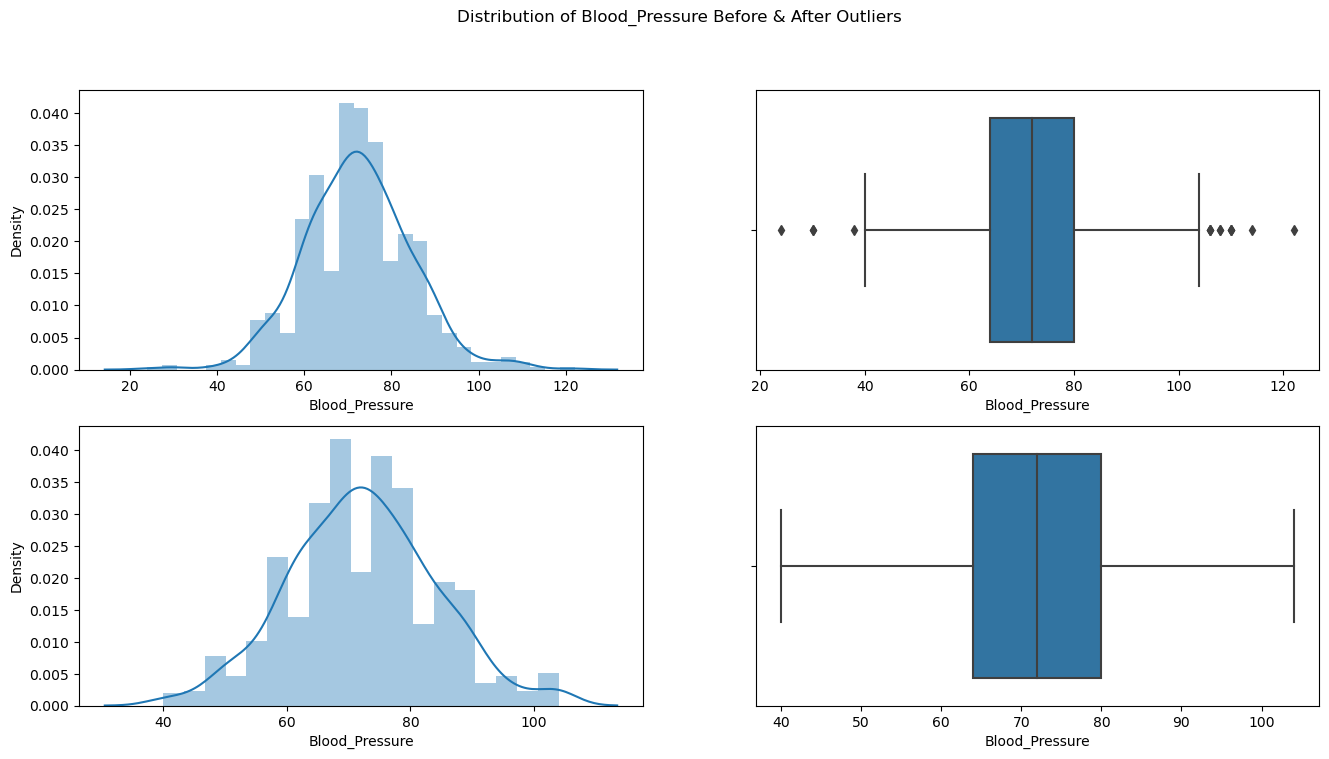

In [135]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.suptitle('Distribution of Blood_Pressure Before & After Outliers')
sns.distplot(diabetes_new['Blood_Pressure'])

plt.subplot(2,2,2)
sns.boxplot(diabetes_new['Blood_Pressure'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Blood_Pressure'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Blood_Pressure'])

plt.show()

### Next Data Tranformation

**Before doing data transformation i have to check the data is normamlly distributed or skewed. So i used Histogram**

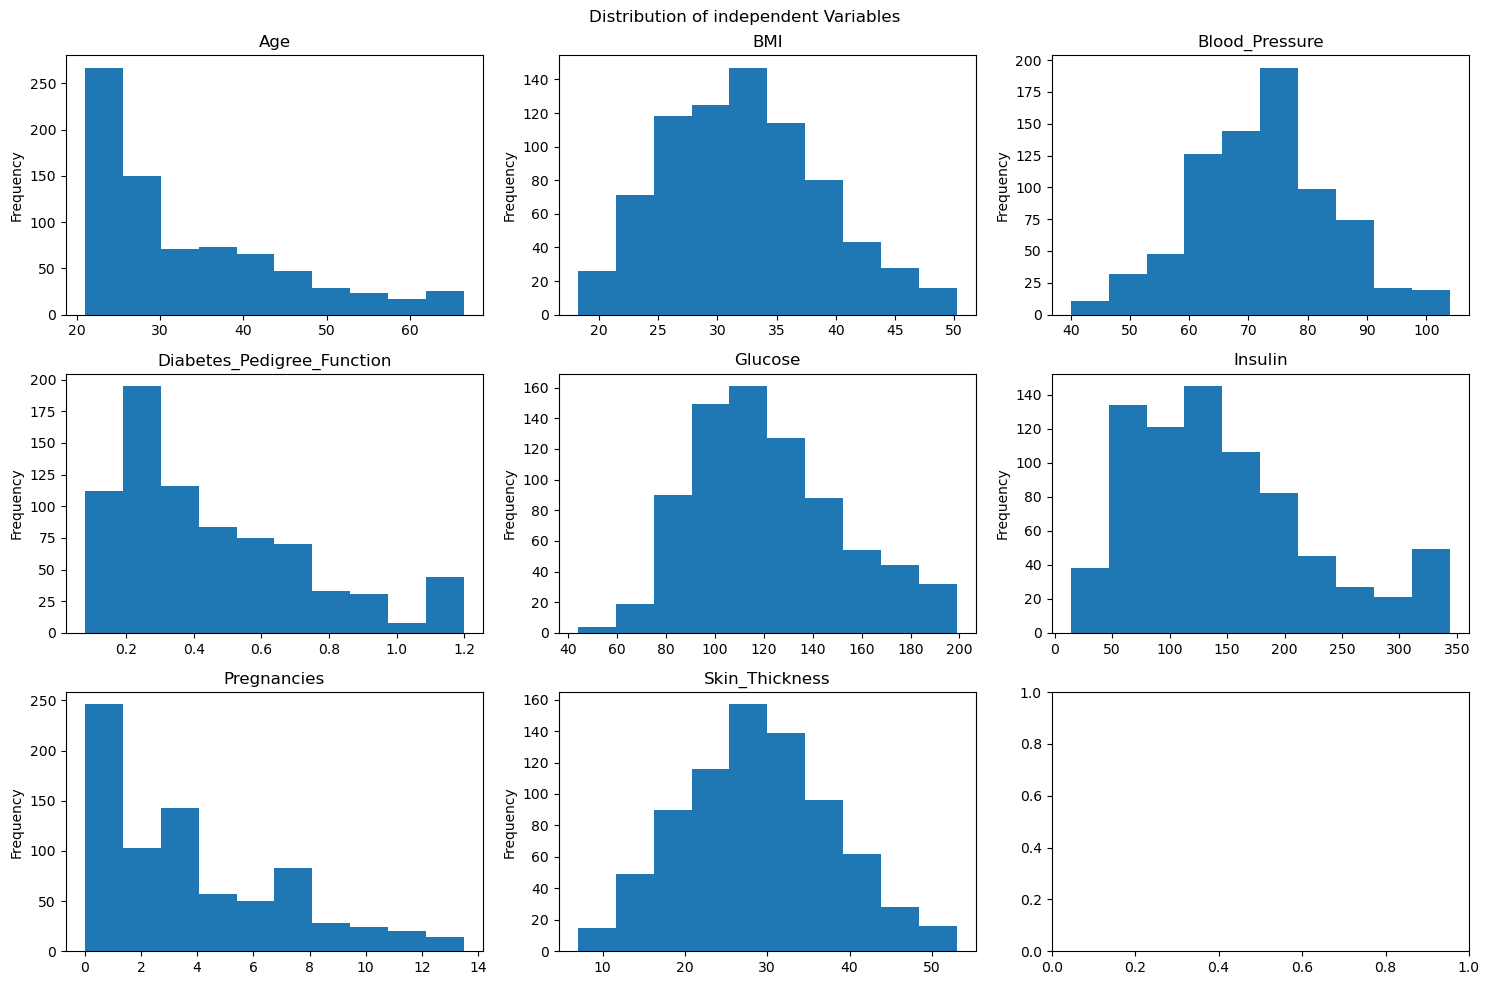

In [136]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
a = 0
columns = new_df_cap.drop('Outcome', axis = 1).columns
for col in columns:

    new_df_cap[col].plot(kind = 'hist', ax = axes[a], title = col)
    a = a +  1

plt.suptitle('Distribution of independent Variables')
plt.tight_layout()
plt.show()

### Now I will start Transformation

In [137]:
# Checking skewness of all variables
new_df_cap.skew()

Age                           1.067170
BMI                           0.358893
Blood_Pressure                0.101521
Diabetes_Pedigree_Function    1.024428
Glucose                       0.530038
Insulin                       0.834643
Outcome                       0.635017
Pregnancies                   0.853962
Skin_Thickness                0.132065
dtype: float64

**From above we can see Blood Pressure, BMI, Glucose and Skin Thickness are close to Normal distribution (by looking thier skewness value). I need to transform Age, Diabetes_Pedigree_Function, Glucose, Insulin, Pregnancies.**

In [138]:
# Using log-transformation
diabetes_log = new_df_cap.copy()
diabetes_log['Age_log'] = np.log(diabetes_log['Age'])

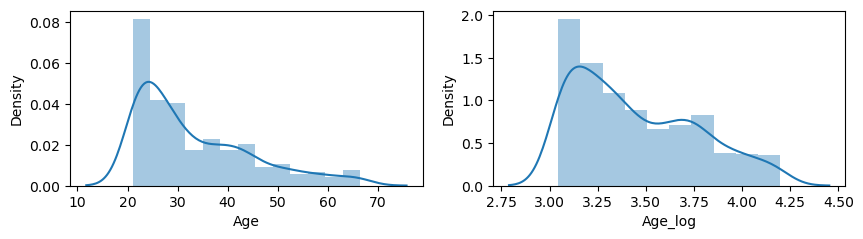

In [139]:
# Comparing

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['Age'])

plt.subplot(2,2,2)
sns.distplot(diabetes_log['Age_log'])

plt.show()

In [140]:
diabetes_log['Age_log'].skew()

0.5809619915840927

In [141]:
# Square root transformation
diabetes_sqrt = new_df_cap.copy()
diabetes_sqrt['Age_sqrt'] = np.sqrt(diabetes_sqrt['Age'])

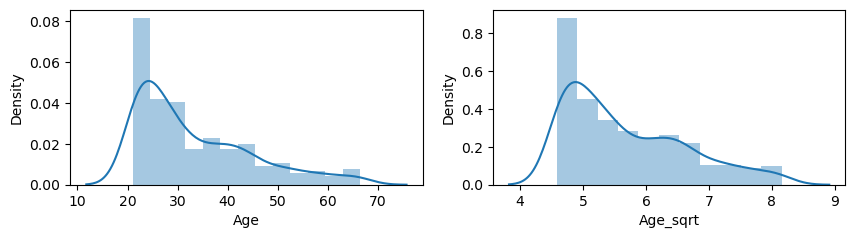

In [142]:
# Comparing

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['Age'])

plt.subplot(2,2,2)
sns.distplot(diabetes_sqrt['Age_sqrt'])

plt.show()

In [143]:
diabetes_sqrt['Age_sqrt'].skew()

0.8141353233726066

**Log Transformation converts the Age variable more normally distributed than Square root transformation.**

In [144]:
# Using log-transformation

diabetes_log['DPF_log'] = np.log(diabetes_log['Diabetes_Pedigree_Function'])

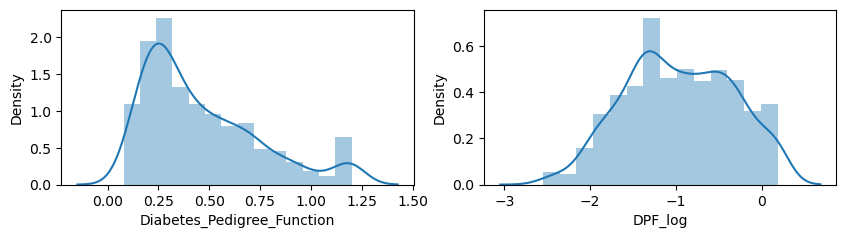

In [145]:
# Comparing
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['Diabetes_Pedigree_Function'])

plt.subplot(2,2,2)
sns.distplot(diabetes_log['DPF_log'])

plt.show()

In [146]:
diabetes_log['DPF_log'].skew()

-0.030510694019356674

In [147]:
diabetes_boxcox = new_df_cap.copy()
from scipy.stats import boxcox

# Using Box-Cox Transformation 
diabetes_boxcox.insert(len(diabetes_boxcox.columns), 'DPF_Boxcox', 
              boxcox(diabetes_boxcox.iloc[:,3])[0])

In [148]:
diabetes_boxcox.head()

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness,DPF_Boxcox
0,50.0,33.6,72.0,0.627,148.0,160.671042,1,6.0,35.000000,-0.464311
1,31.0,26.6,66.0,0.351,85.0,62.269622,0,1.0,29.000000,-1.034462
2,32.0,23.3,64.0,0.672,183.0,186.965234,1,8.0,24.252395,-0.395685
3,21.0,28.1,66.0,0.167,89.0,94.000000,0,1.0,23.000000,-1.753417
4,33.0,43.1,40.0,1.200,137.0,168.000000,1,0.0,35.000000,0.182704


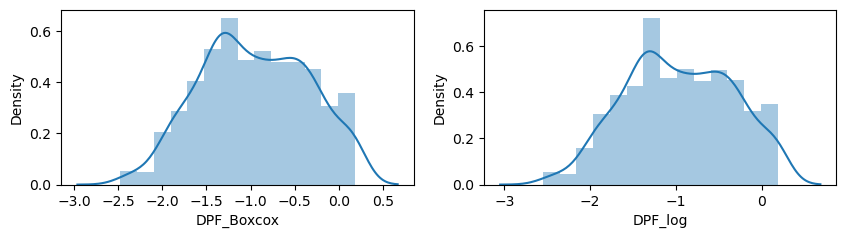

In [149]:
# Comparing
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(diabetes_boxcox['DPF_Boxcox'])

plt.subplot(2,2,2)
sns.distplot(diabetes_log['DPF_log'])

plt.show()

In [150]:
diabetes_log['DPF_log'].skew()

-0.030510694019356674

**There is a minute difference in Log transformation and Boxcox tranformation.**

In [151]:
#Transforming Insulin column using sqrt transformation

diabetes_log['Insulin_sqrt'] = np.sqrt(diabetes_log['Insulin'])

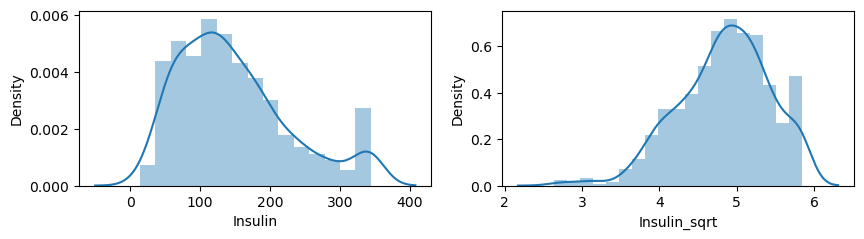

In [152]:
# Comparing
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['Insulin'])

plt.subplot(2,2,2)
sns.distplot(diabetes_log['Insulin_sqrt'])

plt.show()

**For Insulin - Square root transformation gives better result than log transformation.**

In [153]:
# Checking the skewness value after transformation
diabetes_log['Insulin_sqrt'].skew()

-0.49438784203370784

In [163]:
diabetes_log['Pregnancies'].skew()

0.8539617478323778

**Transformation for Pregnancies**

In [177]:
#Transforming Pregnancies column using log transformation base 2

diabetes_log['Preg_sqrt'] = np.sqrt(diabetes_log['Pregnancies'])

**I have used both log transformation and Square root transformation. In log transaformtaion it was going to infinity, so i choosed Square root transformation**

In [182]:
diabetes_log.head()

,Age,BMI,Blood_Pressure,Diabetes_Pedigree_Function,Glucose,Insulin,Outcome,Pregnancies,Skin_Thickness,Age_log,DPF_log,Insulin_sqrt,Preg_sqrt
0,50.0,33.6,72.0,0.627,148.0,160.671042,1,6.0,35.000000,3.912023,-0.466809,5.079359,2.449490
1,31.0,26.6,66.0,0.351,85.0,62.269622,0,1.0,29.000000,3.433987,-1.046969,4.131474,1.000000
2,32.0,23.3,64.0,0.672,183.0,186.965234,1,8.0,24.252395,3.465736,-0.397497,5.230923,2.828427
3,21.0,28.1,66.0,0.167,89.0,94.000000,0,1.0,23.000000,3.044522,-1.789761,4.543295,1.000000
4,33.0,43.1,40.0,1.200,137.0,168.000000,1,0.0,35.000000,3.496508,0.182322,5.123964,0.000000


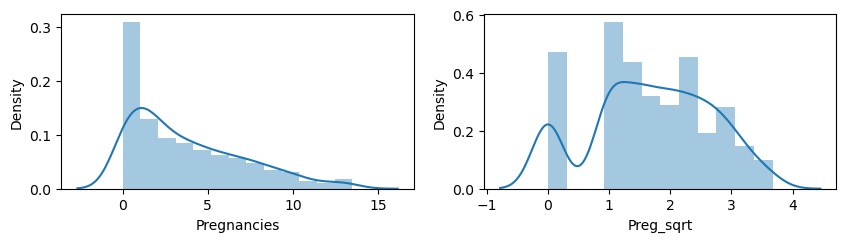

In [180]:
# Comparing
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['Pregnancies'])

plt.subplot(2,2,2)
sns.distplot(diabetes_log['Preg_sqrt'])

plt.show()

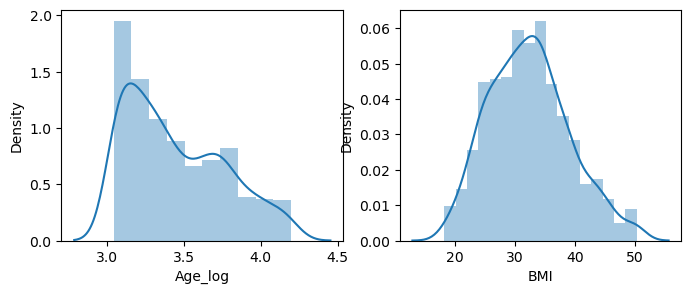

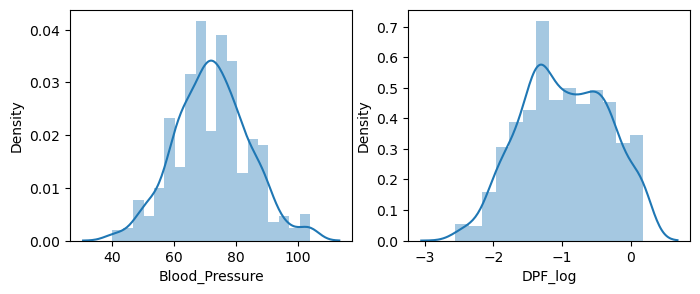

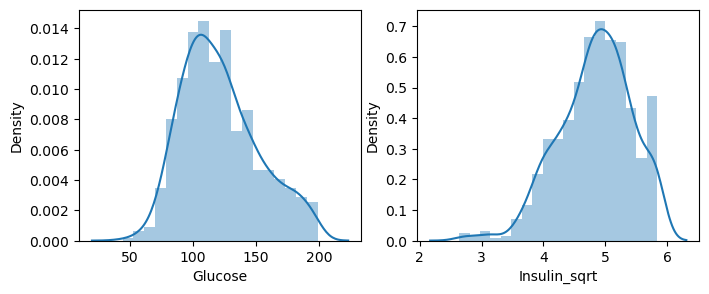

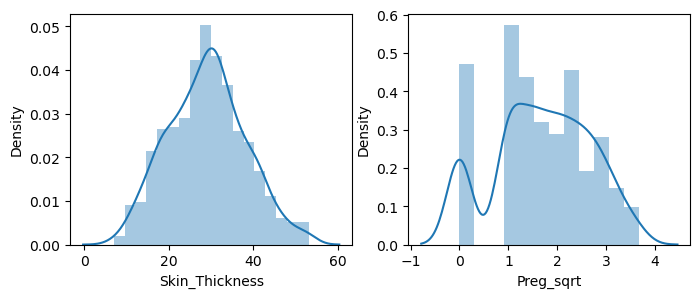

In [184]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_log['Age_log'])

plt.subplot(1,2,2)
sns.distplot(diabetes_log['BMI'])


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_log['Blood_Pressure'])

plt.subplot(1,2,2)
sns.distplot(diabetes_log['DPF_log'])


plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_log['Glucose'])

plt.subplot(1,2,2)
sns.distplot(diabetes_log['Insulin_sqrt'])

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(diabetes_log['Skin_Thickness'])

plt.subplot(1,2,2)
sns.distplot(diabetes_log['Preg_sqrt'])

plt.show()

**NOw all the variables are on the same scale. We can apply feature selection**

## Conclusion

**After seeing the different plots in EDA I found that several factors which are affecting diabetes more like**
**1. Diabetes is quite common in women who have more pregnancies**
**2. People with diabetes have much higher blood glucose levels**
**3. People with diabetes have slightly higher blood pressure**
**4. People with diabetes have a higher BMI**
**5. Older people, especially after 30, people are suffer more to diabetes**
**6. I saw a strong relationship between glucose level and the occurrence of diabetes.**